In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('C:\\Users\\Евгения\\Desktop\\reinforcement_task\\data\\merged_data_final.csv', low_memory=False).drop_duplicates()

In [3]:
df.info

<bound method DataFrame.info of            Date  Цена на арматуру  Индекс стоимости грузоперевозок  LME_Price  \
0    2017-09-11             39600                           1000.0        NaN   
1    2017-09-18             38800                            991.0        NaN   
2    2017-09-25             38800                            992.0        NaN   
3    2017-10-02             37500                            979.0        NaN   
4    2017-10-09             37000                            985.0        NaN   
..          ...               ...                              ...        ...   
255  2022-08-01             47500                           1200.0      628.5   
256  2022-08-08             49000                           1198.0      650.0   
257  2022-08-15             47500                           1211.0      645.0   
258  2022-08-22             46500                           1230.0      641.0   
259  2022-08-29             46000                           1255.0      643.0

In [4]:
df.head(30)

,Date,Цена на арматуру,Индекс стоимости грузоперевозок,LME_Price,Производство арматуры Сортовой прокат_Арматура,Производство арматуры Сортовой прокат_Катанка,Производство арматуры Сортовой прокат_Прутки прочие,Производство сырья ЖРС_Агломерат,Производство сырья ЖРС_Аглоруда,Производство сырья ЖРС_Концентрат,...,Экспорт сырья Лом_Лом стальной,Экспорт сырья Лом_Лом чугуна,Экспорт сырья Металлизованная продукция_Всего отгружено с предприятия,Экспорт сырья Металлизованная продукция_ГБЖ,Экспорт сырья Чугун_Всего отгружено с предприятия,Экспорт сырья Чугун_Литейный чугун,Экспорт сырья Чугун_Передельный чугун,Экспорт арматуры Сортовой прокат_Арматура,Экспорт арматуры Сортовой прокат_Катанка,Экспорт арматуры Сортовой прокат_Прутки прочие
0,2017-09-11,39600,1000.0,NaN,667,241,265,5001,512,9486,...,0,0,0,0,0,0,0,87,75,72
1,2017-09-18,38800,991.0,NaN,667,241,265,5001,512,9486,...,0,0,0,0,0,0,0,87,75,72
2,2017-09-25,38800,992.0,NaN,667,241,265,5001,512,9486,...,0,0,0,0,0,0,0,87,75,72
3,2017-10-02,37500,979.0,NaN,704,264,266,5084,499,9474,...,0,0,0,0,0,0,0,91,82,76
4,2017-10-09,37000,985.0,NaN,704,264,266,5084,499,9474,...,0,0,0,0,0,0,0,91,82,76
5,2017-10-16,35800,962.0,NaN,704,264,266,5084,499,9474,...,0,0,0,0,0,0,0,91,82,76
6,2017-10-23,33800,950.0,NaN,704,264,266,5084,499,9474,...,0,0,0,0,0,0,0,91,82,76
7,2017-10-30,31500,953.0,NaN,704,264,266,5084,499,9474,...,0,0,0,0,0,0,0,91,82,76
8,2017-11-06,30000,951.0,NaN,672,259,244,4784,474,9168,...,0,0,0,0,0,0,0,113,98,66
9,2017-11-13,32500,955.0,NaN,672,259,244,4784,474,9168,...,0,0,0,0,0,0,0,113,98,66


In [5]:
# Функция для определения дубликатов столбцов
def identify_duplicate_columns(df):
    duplicates = {}
    for column in df.columns:
        # Преобразуем столбец в строку для сравнения
        col_contents = df[column].fillna('').astype(str).values
        col_contents.sort()
        encoding = hash(tuple(col_contents))
        if encoding in duplicates:
            duplicates[encoding].append(column)
        else:
            duplicates[encoding] = [column]
    return duplicates

duplicate_columns = identify_duplicate_columns(df)

columns_to_remove = []
for duplicate_set in duplicate_columns.values():
    if len(duplicate_set) > 1:
        # Оставляем первый столбец, остальные добавляем в список для удаления
        columns_to_remove.extend(duplicate_set[1:])

print(f"Исходное количество столбцов: {df.shape[1]}")

# Удаляем дубликаты столбцов
df = df.drop(columns=columns_to_remove)

print(f"Количество удаленных столбцов: {len(columns_to_remove)}")
print(f"Количество оставшихся столбцов: {df.shape[1]}")

Исходное количество столбцов: 84
Количество удаленных столбцов: 7
Количество оставшихся столбцов: 77


In [6]:
# дроп колонок по трешхолду
def drop_columns_with_nan(df, threshold_percent):
  nan_percentages = df.isnull().mean() * 100

  columns_to_drop = nan_percentages[nan_percentages > threshold_percent].index.tolist()
  print(f"Было найдено {len(columns_to_drop)} колонок с содержанием NaN значений больше чем {threshold_percent}%")
  return columns_to_drop

threshold = 10
columns_to_drop = drop_columns_with_nan(df, threshold)
df = df.drop(columns=columns_to_drop)


Было найдено 1 колонок с содержанием NaN значений больше чем 10%


In [7]:
# Функция для проверки наличия смешанных типов данных в столбце
def has_mixed_types(column):
    return column.apply(type).nunique() > 1

# Применение функции ко всем столбцам
mixed_type_columns = df.columns[df.apply(has_mixed_types)]

print("Столбцы со смешанными типами данных:")
print(mixed_type_columns.tolist())

Столбцы со смешанными типами данных:
[]


In [8]:
print(df.shape)

(260, 76)


In [9]:
df.head(30)

,Date,Цена на арматуру,Индекс стоимости грузоперевозок,Производство арматуры Сортовой прокат_Арматура,Производство арматуры Сортовой прокат_Катанка,Производство арматуры Сортовой прокат_Прутки прочие,Производство сырья ЖРС_Агломерат,Производство сырья ЖРС_Аглоруда,Производство сырья ЖРС_Концентрат,Производство сырья ЖРС_Концентрат для дообогащения,...,Экспорт сырья Концентрат коксующегося угля_Жирные,Экспорт сырья Концентрат коксующегося угля_Коксовые,Экспорт сырья Концентрат коксующегося угля_Отощающие,Экспорт сырья Лом_Лом стальной,Экспорт сырья Металлизованная продукция_ГБЖ,Экспорт сырья Чугун_Литейный чугун,Экспорт сырья Чугун_Передельный чугун,Экспорт арматуры Сортовой прокат_Арматура,Экспорт арматуры Сортовой прокат_Катанка,Экспорт арматуры Сортовой прокат_Прутки прочие
0,2017-09-11,39600,1000.0,667,241,265,5001,512,9486,526,...,99,64,0,0,0,0,0,87,75,72
1,2017-09-18,38800,991.0,667,241,265,5001,512,9486,526,...,99,64,0,0,0,0,0,87,75,72
2,2017-09-25,38800,992.0,667,241,265,5001,512,9486,526,...,99,64,0,0,0,0,0,87,75,72
3,2017-10-02,37500,979.0,704,264,266,5084,499,9474,528,...,55,123,0,0,0,0,0,91,82,76
4,2017-10-09,37000,985.0,704,264,266,5084,499,9474,528,...,55,123,0,0,0,0,0,91,82,76
5,2017-10-16,35800,962.0,704,264,266,5084,499,9474,528,...,55,123,0,0,0,0,0,91,82,76
6,2017-10-23,33800,950.0,704,264,266,5084,499,9474,528,...,55,123,0,0,0,0,0,91,82,76
7,2017-10-30,31500,953.0,704,264,266,5084,499,9474,528,...,55,123,0,0,0,0,0,91,82,76
8,2017-11-06,30000,951.0,672,259,244,4784,474,9168,556,...,93,129,0,0,0,0,0,113,98,66
9,2017-11-13,32500,955.0,672,259,244,4784,474,9168,556,...,93,129,0,0,0,0,0,113,98,66


In [10]:
def drop_columns_with_zeros(df, threshold_percent):
    """
    Удаляет столбцы, где процент нулевых значений превышает заданный порог
    
    Параметры:
        df (pd.DataFrame): Исходный DataFrame
        threshold_percent (float): Порог в процентах (0-100)
    
    Возвращает:
        list: Список удаленных колонок
    """
    # Вычисляем процент нулей для каждой колонки
    zero_percentages = (df == 0).mean() * 100
    
    # Фильтруем колонки, превышающие порог
    columns_to_drop = zero_percentages[zero_percentages > threshold_percent].index.tolist()
    
    print(f"Найдено {len(columns_to_drop)} колонок с содержанием нулей больше {threshold_percent}%")
    if columns_to_drop:
        print("Список удаляемых колонок:")
        for col in columns_to_drop:
            print(f"- {col} ({zero_percentages[col]:.1f}% нулей)")
    
    return columns_to_drop

# Пример использования
threshold = 40
columns_to_drop = drop_columns_with_zeros(df, threshold)

# Удаляем колонки из основного датафрейма
df = df.drop(columns=columns_to_drop)



Найдено 7 колонок с содержанием нулей больше 40%
Список удаляемых колонок:
- Импорт сырья Концентрат коксующегося угля_Жирные (96.5% нулей)
- Экспорт сырья ЖРС_Агломерат (100.0% нулей)
- Экспорт сырья ЖРС_Аглоруда (44.6% нулей)
- Экспорт сырья Концентрат коксующегося угля_Отощающие (94.6% нулей)
- Экспорт сырья Лом_Лом стальной (91.9% нулей)
- Экспорт сырья Металлизованная продукция_ГБЖ (51.2% нулей)
- Экспорт сырья Чугун_Литейный чугун (85.0% нулей)


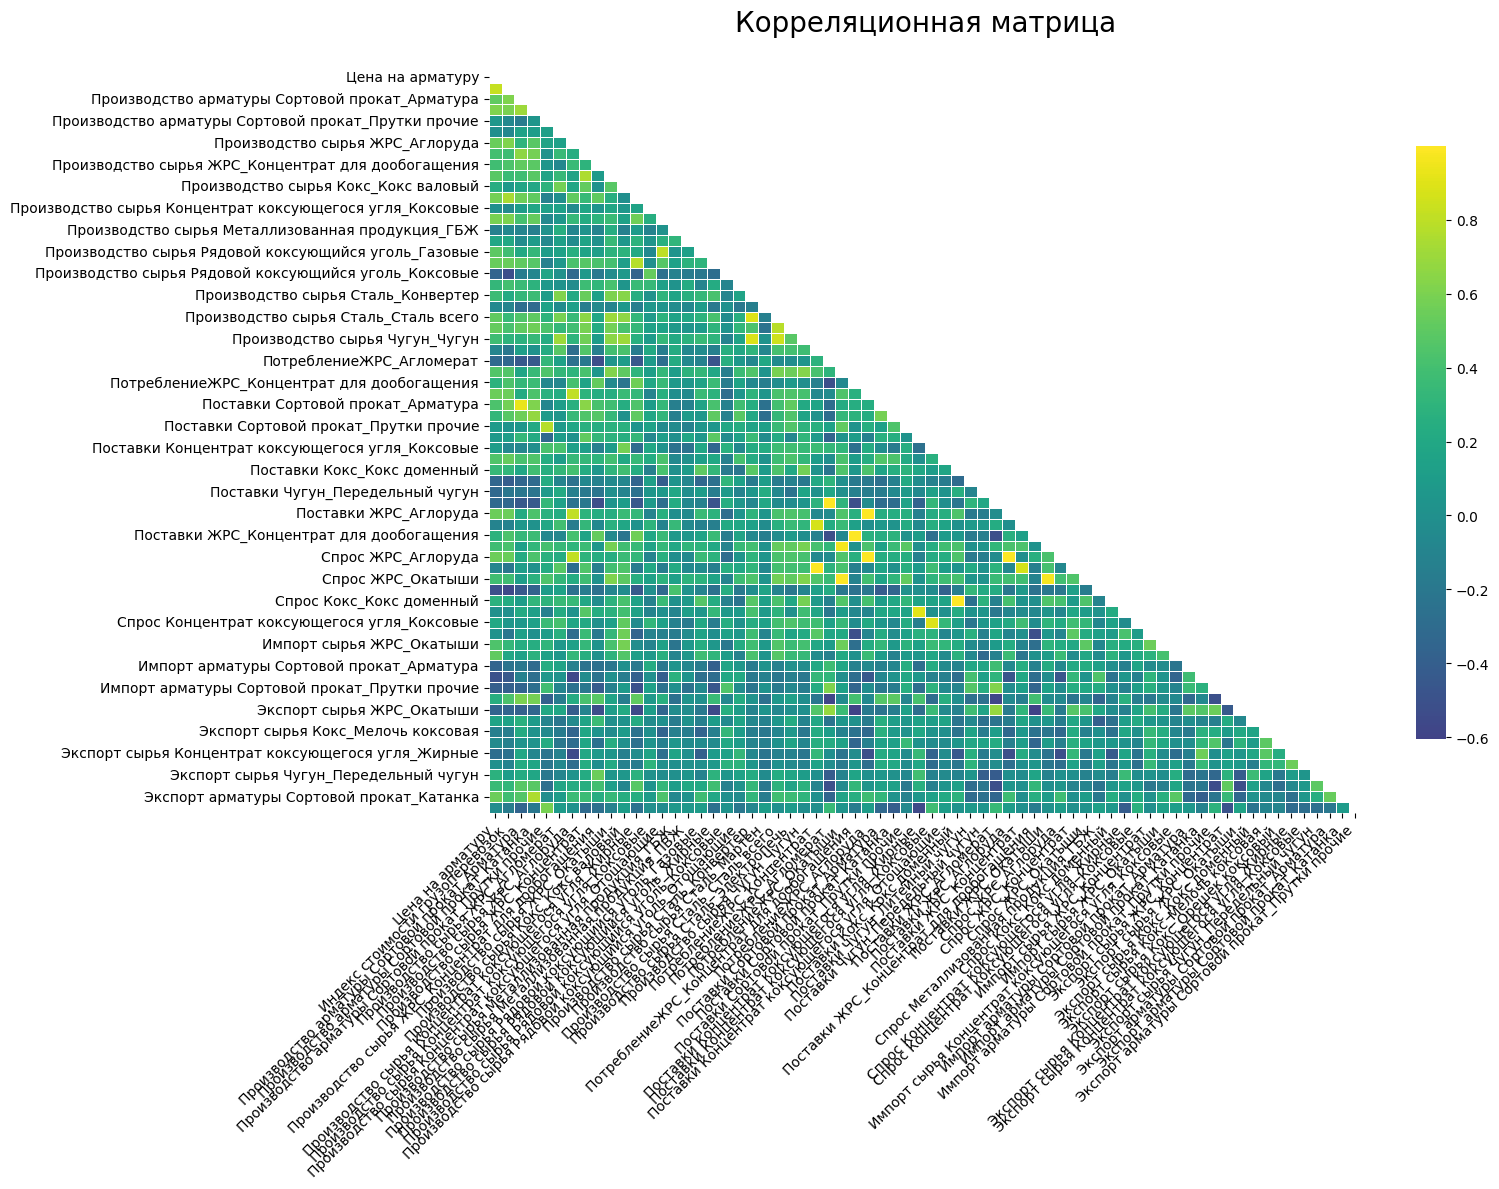

In [11]:
# Версия для корреляционной матрицы
plt.figure(figsize=(16, 12))

# Рассчет корреляций
corr_matrix = df.select_dtypes(include=['number']).corr()

# Маска для верхнего треугольника
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Построение графика
sns.heatmap(
    corr_matrix,
    mask=mask,
    cmap='viridis',
    annot=False,
    fmt=".2f",
    center=0,
    linewidths=0.5,
    cbar_kws={"shrink": 0.8}
)

# Настройки отображения
plt.title('Корреляционная матрица\n', fontsize=20)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.savefig('correlation_matrix.png', dpi=300)
plt.show()

In [12]:
df.shape

(260, 69)

C:\Users\Евгения\AppData\Local\Temp\ipykernel_768\3575727765.py:22: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[ 0.31496063  0.18897638  0.18897638 -0.01574803 -0.09448819 -0.28346457
 -0.5984252  -0.96062992 -1.19685039 -0.80314961 -0.80314961 -0.88188976
 -0.96062992 -0.92913386 -0.91338583 -0.47244094 -0.31496063 -0.31496063
 -0.31496063 -0.36220472 -0.48818898 -0.61417323 -0.56692913 -0.58267717
 -0.77165354 -0.74015748 -0.67716535 -0.62992126 -0.44094488 -0.23622047
 -0.23622047 -0.26771654 -0.26771654 -0.18897638  0.04724409  0.01574803
  0.04724409  0.04724409  0.         -0.03149606 -0.03149606 -0.07874016
 -0.07874016 -0.06299213  0.03149606 -0.01574803 -0.01574803  0.28346457
  0.32283465  0.49606299  0.86614173  1.7480315   1.77165354  1.69291339
  1.1023622   0.78740157  0.61417323  0.50393701  0.33070866  0.2992126
  0.18897638  0.11023622  0.06299213  0.          0.         -0.04724409
 -0.09448819

Порядок дифференцирования d: 1


c:\Users\Евгения\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)
c:\Users\Евгения\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)
c:\Users\Евгения\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)
c:\Users\Евгения\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)
c:\Users\Евгения\AppData\Local\Progr

Лучшие параметры ARIMA: (1, 1, 0)

Результаты ARIMA:


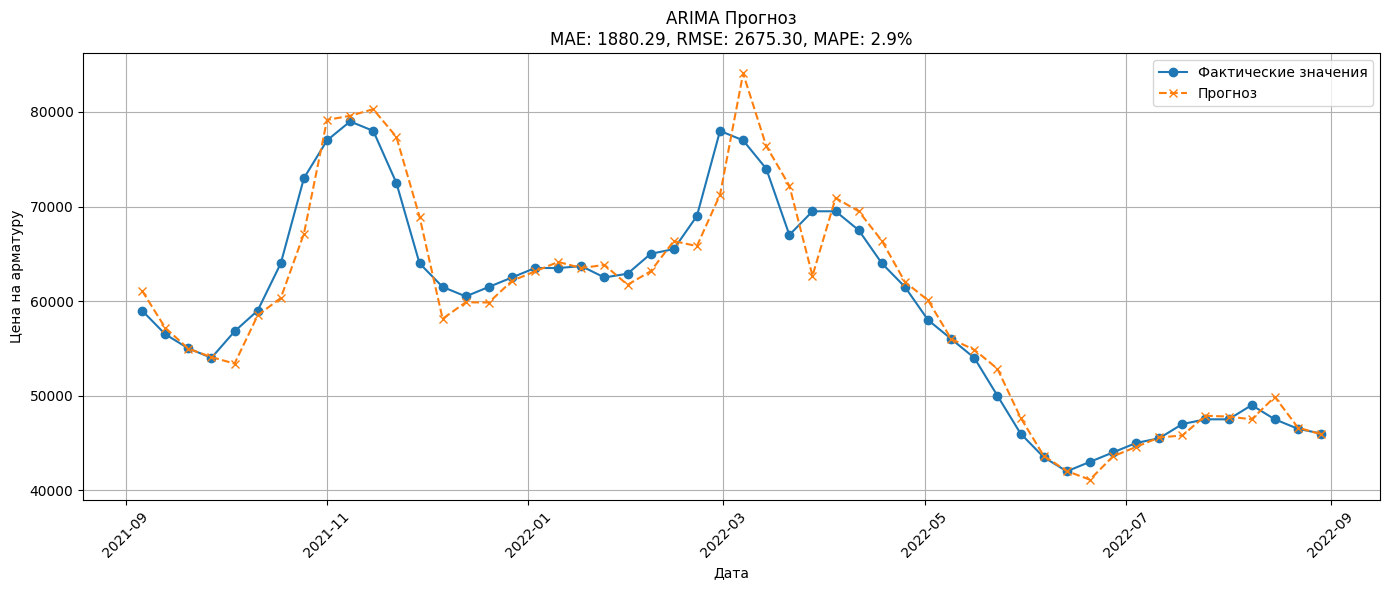


Результаты Gradient Boosting:


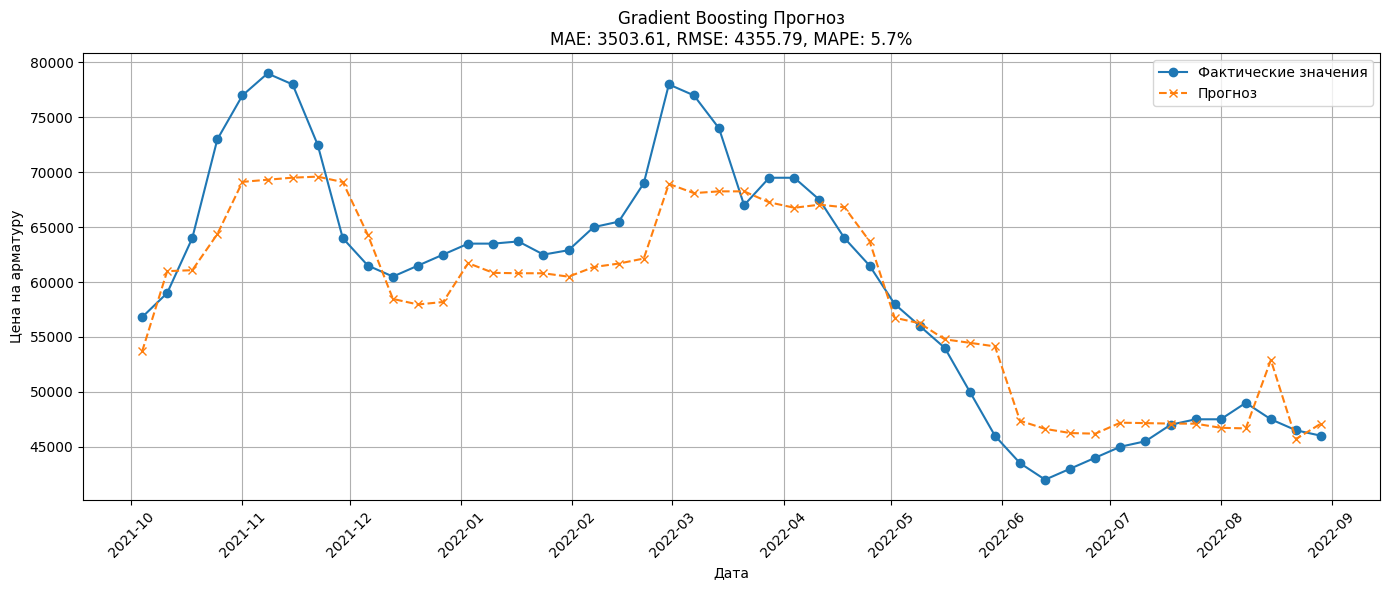


Метрики для ARIMA:
MAE: 1880.29
RMSE: 2675.30
MAPE: 2.94

Метрики для Gradient Boosting:
MAE: 3503.61
RMSE: 4355.79
MAPE: 5.71


In [14]:
# ПОЧИЩЕНО И ПРАВИЛЬНО ВОЗМОЖНО? ПРАВИЛЬНО ЛИ ДЕЛИТЬ НА ТЕСТ И ТРЕЙН
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.preprocessing import RobustScaler

# 1. Загрузка и подготовка данных  ПОЧИЩЕНО И ПРАВИЛЬНО
df = pd.read_csv(r'C:\Users\Евгения\Desktop\reinforcement_task\data\filtered_data.csv', parse_dates=['Date'], index_col='Date').sort_index()
target = 'Цена на арматуру'

# Последовательное разделение без перемешивания
train_size = int(len(df) * 0.8)
train_raw = df.iloc[:train_size]
test_raw = df.iloc[train_size:]

# 2. Масштабирование с сохранением индексов
scaler = RobustScaler()
train_raw.loc[:, target] = scaler.fit_transform(train_raw[[target]])
test_raw.loc[:, target] = scaler.transform(test_raw[[target]])

# 3. Проверка стационарности
def check_stationarity(series):
    result = adfuller(series.dropna())
    return result[1] > 0.05

d = 0
current_series = train_raw[target].copy()
while check_stationarity(current_series):
    current_series = current_series.diff().dropna()
    d += 1
print(f'Порядок дифференцирования d: {d}')

# 4. Подбор параметров ARIMA
def find_best_arima(series, max_p=3, max_q=3):
    best_aic = np.inf
    best_order = (0, d, 0)
    
    for p in range(max_p+1):
        for q in range(max_q+1):
            try:
                model = ARIMA(series, order=(p,d,q))
                results = model.fit()
                if results.aic < best_aic:
                    best_aic = results.aic
                    best_order = (p,d,q)
            except:
                continue
    return best_order

best_order = find_best_arima(train_raw[target])
print(f'Лучшие параметры ARIMA: {best_order}')

# 5. Функция прогнозирования ARIMA
def arima_forecast(train_data, test_data, order):
    history = list(train_data)
    predictions = []
    
    for t in range(len(test_data)):
        model = ARIMA(history, order=order)
        model_fit = model.fit()
        yhat = model_fit.forecast()[0]
        predictions.append(yhat)
        history.append(test_data.iloc[t])
    return predictions

# 6. Создание временных признаков
def create_features(df, target_col, max_lag=4):
    df = df.copy()
    
    # Создание лагов
    for lag in range(1, max_lag+1):
        df[f'lag_{lag}'] = df[target_col].shift(lag)
    
    # Скользящие статистики
    window = 4
    df['rolling_mean'] = df[target_col].rolling(window).mean()
    df['rolling_std'] = df[target_col].rolling(window).std()
    
    # Временные характеристики
    df['month'] = df.index.month
    df['quarter'] = df.index.quarter
    
    return df.dropna()

# Обработка данных с сохранением индексов
train_processed = create_features(train_raw, target)
test_processed = create_features(test_raw, target)

# 7. Заполнение пропусков в тестовых данных
for lag in [1, 2, 3, 4]:
    test_processed[f'lag_{lag}'] = test_processed[f'lag_{lag}'].fillna(
        train_processed[target].iloc[-lag]
    )

# 8. Обучение модели Gradient Boosting
X_train = train_processed.drop(columns=[target])
y_train = train_processed[target]
X_test = test_processed.drop(columns=[target])
y_test = test_processed[target]

gb_model = GradientBoostingRegressor(
    n_estimators=200,
    learning_rate=0.05,
    max_depth=5,
    random_state=42
)
gb_model.fit(X_train, y_train)
gb_pred = gb_model.predict(X_test)

# 9. Генерация прогнозов ARIMA
arima_predictions = arima_forecast(train_raw[target], test_raw[target], best_order)

# 10. Синхронизация размеров данных
def align_data(arr1, arr2, dates):
    min_len = min(len(arr1), len(arr2))
    return arr1[-min_len:], arr2[-min_len:], dates[-min_len:]

# Выравнивание ARIMA прогнозов
arima_values, test_arima, arima_dates = align_data(
    arima_predictions, 
    test_raw[target].values, 
    test_raw.index
)

# Выравнивание Gradient Boosting прогнозов
gb_values, test_gb, gb_dates = align_data(
    gb_pred,
    y_test.values,
    test_processed.index
)

# 11. Функция визуализации
def plot_results(true, pred, dates, title):
    true = scaler.inverse_transform(np.array(true).reshape(-1, 1)).flatten()
    pred = scaler.inverse_transform(np.array(pred).reshape(-1, 1)).flatten()
    
    plt.figure(figsize=(14, 6))
    plt.plot(dates, true, label='Фактические значения', marker='o')
    plt.plot(dates, pred, label='Прогноз', linestyle='--', marker='x')
    
    mae = mean_absolute_error(true, pred)
    rmse = np.sqrt(mean_squared_error(true, pred))
    mape = np.mean(np.abs((true - pred)/true)) * 100
    
    plt.title(f'{title}\nMAE: {mae:.2f}, RMSE: {rmse:.2f}, MAPE: {mape:.1f}%')
    plt.xlabel('Дата')
    plt.ylabel('Цена на арматуру')
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()

# 12. Визуализация результатов
print("\nРезультаты ARIMA:")
plot_results(test_arima, arima_values, arima_dates, 'ARIMA Прогноз')

print("\nРезультаты Gradient Boosting:")
plot_results(test_gb, gb_values, gb_dates, 'Gradient Boosting Прогноз')

# 13. Сравнение метрик
def print_metrics(true, pred, model_name):
    true = scaler.inverse_transform(np.array(true).reshape(-1, 1)).flatten()
    pred = scaler.inverse_transform(np.array(pred).reshape(-1, 1)).flatten()
    
    metrics = {
        'MAE': mean_absolute_error(true, pred),
        'RMSE': np.sqrt(mean_squared_error(true, pred)),
        'MAPE': np.mean(np.abs((true - pred)/true)) * 100
    }
    
    print(f"\nМетрики для {model_name}:")
    for k, v in metrics.items():
        print(f"{k}: {v:.2f}")

print_metrics(test_arima, arima_values, 'ARIMA')
print_metrics(test_gb, gb_values, 'Gradient Boosting')

In [ ]:

# df = pd.read_csv('merged_data_final.csv')

# # 1. Преобразование дат в числовой формат (если нужно)
# def convert_dates(df):
#     for col in df.select_dtypes(include=['object']).columns:
#         try:
#             df[col] = pd.to_datetime(df[col]).astype('int64') // 10**1
#         except:
#             continue
#     return df

# df = convert_dates(df)

# # 2. Разделение на числовые и нечисловые колонки
# non_numeric_cols = df.select_dtypes(exclude=[np.number]).columns.tolist()
# numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()

# # 3. Расчет корреляций (только для числовых колонок)
# corr_matrix = df[numeric_cols].corr().abs()

# # 4. Определение колонок для удаления (порог 50%)
# threshold = 0.5
# mean_correlations = corr_matrix.mean()
# columns_to_drop = mean_correlations[mean_correlations < threshold].index.tolist()

# # 5. Проверка и фильтрация колонок
# valid_columns_to_drop = list(set(columns_to_drop) & set(numeric_cols))
# filtered_numeric_cols = [col for col in numeric_cols if col not in valid_columns_to_drop]

# # 6. Создание финального DataFrame
# df_filtered = pd.concat([
#     df[non_numeric_cols], 
#     df[filtered_numeric_cols]
# ], axis=1)

# # 7. Сохранение и отчет
# df_filtered.to_csv('filtered_data_50perc.csv', index=False)
# print(f"Удалено столбцов: {len(valid_columns_to_drop)}")
# print(f"Осталось столбцов: {len(df_filtered.columns)}")
# print("Удаленные столбцы:", valid_columns_to_drop)

In [ ]:
# df = pd.read_csv('C:\\Users\\Евгения\\Desktop\\reinforcement_task\\data\\filtered_data.csv', low_memory=False).drop_duplicates()

# # Версия для корреляционной матрицы
# plt.figure(figsize=(16, 12))

# # Рассчет корреляций
# corr_matrix = df.select_dtypes(include=['number']).corr()

# # Маска для верхнего треугольника
# mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# # Построение графика
# sns.heatmap(
#     corr_matrix,
#     mask=mask,
#     cmap='viridis',
#     annot=False,
#     fmt=".2f",
#     center=0,
#     linewidths=0.5,
#     cbar_kws={"shrink": 0.8}
# )

# # Настройки отображения
# plt.title('Корреляционная матрица\n', fontsize=20)
# plt.xticks(rotation=45, ha='right')
# plt.yticks(rotation=0)
# plt.tight_layout()
# plt.savefig('correlation_matrix.png', dpi=300)
# plt.show()

In [ ]:
# import pandas as pd
# import matplotlib.pyplot as plt
# from prophet import Prophet
# # Удаление строк с пустыми значениями
# df_cleaned = df.dropna()

# print(forecast.isnull().sum())

# # Загрузка данных
# df = pd.read_csv('filtered_data.csv', parse_dates=['Date'], dayfirst=True)
# df = df.set_index('Date')  # Дата как индекс
# series = df['Цена на арматуру']  # Исходный временной ряд

# # Подготовка данных для Prophet
# prophet_df = series.reset_index()
# prophet_df.columns = ['ds', 'y']

# # Убедимся, что столбец 'ds' имеет правильный формат даты
# prophet_df['ds'] = pd.to_datetime(prophet_df['ds'])

# # Создание и обучение модели
# model = Prophet(interval_width=0.95)  # 95% доверительный интервал
# model.fit(prophet_df)

# # Генерация прогноза на 365 дней вперед
# future = model.make_future_dataframe(periods=365)
# forecast = model.predict(future)

# # Визуализация
# plt.figure(figsize=(12, 6))
# plt.plot(series.index, series.values, label='Исторические данные')
# plt.plot(forecast['ds'], forecast['yhat'], label='Прогноз', color='orange')

# # Заполнение доверительного интервала
# plt.fill_between(
#     forecast['ds'], 
#     forecast['yhat_lower'], 
#     forecast['yhat_upper'], 
#     color='orange', 
#     alpha=0.2,
#     label='95% доверительный интервал'
# )

# plt.title('Цена на арматуру с прогнозом')
# plt.xlabel('Дата')
# plt.ylabel('Цена')
# plt.legend()
# plt.grid(True)
# plt.show()


In [ ]:
# import pandas as pd
# import matplotlib.pyplot as plt

# # Создание примера данных
# data = {
#     'date': pd.date_range(start='2022-01-01', periods=100, freq='D'),
#     'price': (50 + (pd.Series(range(100)) * 0.5) + (10 * pd.Series(range(100)).apply(lambda x: (-1)**x * x % 5))).cumsum()).tolist()
# }

# # Создание DataFrame
# df = pd.DataFrame(data)

# # Установка даты как индекса
# df.set_index('date', inplace=True)

# # Построение графика
# plt.figure(figsize=(12, 6))
# plt.plot(df.index, df['price'], label='Цена на арматуру', color='blue')
# plt.title('Временной ряд цен на арматуру')
# plt.xlabel('Дата')
# plt.ylabel('Цена')
# plt.legend()
# plt.grid()
# plt.show()


In [ ]:

# df = pd.read_csv("filtered_data.csv", parse_dates=["Date"])
# df.sort_values("Date", inplace=True)

# # Создание целевой переменной N
# n_max = 6
# for i in range(1, n_max + 1):
#     df[f'future_avg_{i}'] = df['Цена на арматуру'].shift(-i).rolling(i).mean()

# df['N'] = 1
# for n in range(n_max, 0, -1):
#     condition = df['Цена на арматуру'] < df[f'future_avg_{n}']
#     df.loc[condition, 'N'] = n

# # Удаление временных столбцов
# df.drop(columns=[f'future_avg_{i}' for i in range(1, n_max + 1)], inplace=True)

In [ ]:
# import pandas as pd
# from sklearn.decomposition import PCA
# from sklearn.preprocessing import StandardScaler
# from sklearn.model_selection import TimeSeriesSplit
# import numpy as np

# # 1. Загрузка данных
# df = pd.read_csv('filtered_data.csv', parse_dates=['Date'])

# # 2. Создание целевой переменной N (пример из предыдущего обсуждения)
# n_max = 6
# for i in range(1, n_max + 1):
#     df[f'future_avg_{i}'] = df['Цена на арматуру'].shift(-i).rolling(i).mean()

# df['N'] = 1
# for n in range(n_max, 0, -1):
#     condition = df['Цена на арматуру'] < df[f'future_avg_{n}']
#     df.loc[condition, 'N'] = n

# # 3. Предобработка данных
# # Удаление временных колонок и нечисловых данных
# df = df.drop(columns=[f'future_avg_{i}' for i in range(1, n_max + 1)] + ['Date'])
# df = df.dropna()  # Удаление строк с пропусками

# # 4. Разделение на признаки и целевую переменную
# X = df.drop(columns=['N'])
# y = df['N']

# # 5. Временное разделение данных
# test_size = int(len(X) * 0.2)
# X_train, X_test = X[:-test_size], X[-test_size:]
# y_train, y_test = y[:-test_size], y[-test_size:]

# # 6. Масштабирование данных
# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)

# # 7. Применение PCA
# pca = PCA(n_components=0.92)
# X_train_pca = pca.fit_transform(X_train_scaled)
# X_test_pca = pca.transform(X_test_scaled)

# # 8. Результаты и визуализация
# print(f'Исходное количество признаков: {X.shape[1]}')
# print(f'Уменьшенное количество признаков: {pca.n_components_}')
# print(f'Объясненная дисперсия: {np.sum(pca.explained_variance_ratio_):.2f}')

# # 9. Сохранение моделей предобработки (дополнительно)
# import joblib
# joblib.dump(scaler, 'scaler.pkl')
# joblib.dump(pca, 'pca_model.pkl')

In [ ]:
df.head(30)

,Date,Цена на арматуру,Индекс стоимости грузоперевозок,Производство арматуры Сортовой прокат_Арматура,Производство арматуры Сортовой прокат_Катанка,Производство арматуры Сортовой прокат_Прутки прочие,Производство сырья ЖРС_Агломерат,Производство сырья ЖРС_Аглоруда,Производство сырья ЖРС_Концентрат,Производство сырья ЖРС_Концентрат для дообогащения,...,Экспорт сырья ЖРС_Окатыши,Экспорт сырья Кокс_Кокс доменный,Экспорт сырья Кокс_Мелочь коксовая,Экспорт сырья Кокс_Орешек коксовый,Экспорт сырья Концентрат коксующегося угля_Жирные,Экспорт сырья Концентрат коксующегося угля_Коксовые,Экспорт сырья Чугун_Передельный чугун,Экспорт арматуры Сортовой прокат_Арматура,Экспорт арматуры Сортовой прокат_Катанка,Экспорт арматуры Сортовой прокат_Прутки прочие
0,2017-09-11,39600,1000.0,667,241,265,5001,512,9486,526,...,196,0,0,0,99,64,0,87,75,72
1,2017-09-18,38800,991.0,667,241,265,5001,512,9486,526,...,196,0,0,0,99,64,0,87,75,72
2,2017-09-25,38800,992.0,667,241,265,5001,512,9486,526,...,196,0,0,0,99,64,0,87,75,72
3,2017-10-02,37500,979.0,704,264,266,5084,499,9474,528,...,282,0,0,0,55,123,0,91,82,76
4,2017-10-09,37000,985.0,704,264,266,5084,499,9474,528,...,282,0,0,0,55,123,0,91,82,76
5,2017-10-16,35800,962.0,704,264,266,5084,499,9474,528,...,282,0,0,0,55,123,0,91,82,76
6,2017-10-23,33800,950.0,704,264,266,5084,499,9474,528,...,282,0,0,0,55,123,0,91,82,76
7,2017-10-30,31500,953.0,704,264,266,5084,499,9474,528,...,282,0,0,0,55,123,0,91,82,76
8,2017-11-06,30000,951.0,672,259,244,4784,474,9168,556,...,489,0,0,0,93,129,0,113,98,66
9,2017-11-13,32500,955.0,672,259,244,4784,474,9168,556,...,489,0,0,0,93,129,0,113,98,66


In [ ]:
# import pandas as pd
# import numpy as np
# from sklearn.model_selection import train_test_split
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.metrics import mean_absolute_error, mean_squared_error
# import matplotlib.pyplot as plt

# # Загрузка данных
# df = pd.read_csv('filtered_data.csv', parse_dates=['Date'], index_col='Date')

# # Сортировка по дате
# df = df.sort_index()

# # Создание временных признаков
# def create_time_features(df):
#     # Лаги для целевой переменной (1, 2, 3 недели)
#     for lag in [1, 2, 3, 4]:
#         df[f'price_lag_{lag}'] = df['Цена на арматуру'].shift(lag)
    
#     # Скользящее среднее и стандартное отклонение
#     window = 4
#     df['rolling_mean'] = df['Цена на арматуру'].rolling(window).mean()
#     df['rolling_std'] = df['Цена на арматуру'].rolling(window).std()
    
#     # Сезонные признаки (месяц, квартал)
#     df['month'] = df.index.month
#     df['quarter'] = df.index.quarter
    
#     return df

# # Применение функции
# df = create_time_features(df)

# # Удаление строк с пропусками
# df = df.dropna()

# # Разделение на признаки и целевую переменную
# target = 'Цена на арматуру'
# X = df.drop(columns=[target])
# y = df[target]

# # Разделение на обучающую и тестовую выборки (80/20)
# train_size = int(len(X) * 0.8)
# X_train, X_test = X[:train_size], X[train_size:]
# y_train, y_test = y[:train_size], y[train_size:]

# # Обучение модели
# model = RandomForestRegressor(n_estimators=100, random_state=42)
# model.fit(X_train, y_train)

# # Прогнозирование
# y_pred = model.predict(X_test)

# # Оценка модели
# mae = mean_absolute_error(y_test, y_pred)
# rmse = np.sqrt(mean_squared_error(y_test, y_pred))
# print(f'MAE: {mae:.2f}, RMSE: {rmse:.2f}')

# # Визуализация
# plt.figure(figsize=(12, 6))
# plt.plot(y_test.index, y_test, label='Фактические значения')
# plt.plot(y_test.index, y_pred, label='Прогноз')
# plt.title('Прогноз цены на арматуру')
# plt.xlabel('Дата')
# plt.ylabel('Цена')
# plt.legend()
# plt.grid(True)
# plt.show()

In [ ]:
# import pandas as pd
# import numpy as np
# from statsmodels.tsa.arima.model import ARIMA
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.metrics import mean_absolute_error, mean_squared_error
# import matplotlib.pyplot as plt
# from scipy import stats

# # Загрузка и подготовка данных
# df = pd.read_csv('filtered_data.csv', parse_dates=['Date'], index_col='Date').sort_index()
# target = 'Цена на арматуру'

# # 1. Обработка выбросов с помощью межквартильного размаха (более устойчивый метод)
# def handle_outliers(df, column, threshold=1.5):
#     q1 = df[column].quantile(0.25)
#     q3 = df[column].quantile(0.75)
#     iqr = q3 - q1
#     mask = (df[column] >= q1 - threshold*iqr) & (df[column] <= q3 + threshold*iqr)
#     return df[mask]

# df_clean = handle_outliers(df, target)
# print(f"Удалено выбросов: {len(df) - len(df_clean)}")

# # 2. Проверка стационарности и дифференцирование
# def make_stationary(series):
#     # Тест Дики-Фуллера
#     from statsmodels.tsa.stattools import adfuller
#     result = adfuller(series)
#     print(f'ADF Statistic: {result[0]:.3f}')
#     print(f'p-value: {result[1]:.3f}')
    
#     # Дифференцирование при необходимости
#     if result[1] > 0.05:
#         print("Ряд не стационарен - применяем дифференцирование")
#         return series.diff().dropna()
#     return series

# stationary_series = make_stationary(df_clean[target])

# # 3. Создание временных признаков
# def create_features(df, target_col):
#     # Лаги для дифференцированного ряда
#     for lag in [1, 2, 3, 4]:
#         df[f'lag_{lag}'] = df[target_col].shift(lag)
    
#     # Скользящие статистики
#     window = 4
#     df['rolling_mean'] = df[target_col].rolling(window).mean()
#     df['rolling_std'] = df[target_col].rolling(window).std()
    
#     # Сезонность
#     df['month'] = df.index.month
#     df['quarter'] = df.index.quarter
    
#     return df.dropna()

# df_processed = create_features(df_clean, target)

# # 4. Разделение данных
# train_size = int(len(df_processed) * 0.8)
# train, test = df_processed.iloc[:train_size], df_processed.iloc[train_size:]

# # 5. Модель Random Forest
# X_train = train.drop(columns=[target])
# y_train = train[target]
# X_test = test.drop(columns=[target])
# y_test = test[target]

# rf = RandomForestRegressor(n_estimators=100, random_state=42)
# rf.fit(X_train, y_train)
# rf_pred = rf.predict(X_test)

# # 6. Правильная реализация ARIMA с обновлением модели
# def arima_rolling_forecast(history, test_steps, order=(4,1,2)):
#     predictions = []
#     for t in range(len(test_steps)):
#         model = ARIMA(history, order=order)
#         model_fit = model.fit()
#         yhat = model_fit.forecast()[0]
#         predictions.append(yhat)
#         history = np.append(history, test_steps[t])  # Обновляем историю
#     return predictions

# # Подготовка данных для ARIMA
# train_arima = train[target].values
# test_arima = test[target].values

# # Прогнозирование с обновлением модели
# arima_pred = arima_rolling_forecast(train_arima, test_arima, order=(4,1,2))

# # 7. Сравнение моделей
# def evaluate(y_true, y_pred, model_name):
#     mae = mean_absolute_error(y_true, y_pred)
#     rmse = np.sqrt(mean_squared_error(y_true, y_pred))
#     print(f'{model_name} MAE: {mae:.2f}, RMSE: {rmse:.2f}')

# evaluate(y_test, rf_pred, 'Random Forest')
# evaluate(test[target], arima_pred, 'ARIMA')

# # 8. Визуализация
# plt.figure(figsize=(14, 7))
# plt.plot(test.index, test[target], label='Реальные значения', color='blue')
# plt.plot(test.index, rf_pred, label='Random Forest', color='green', linestyle='--')
# plt.plot(test.index, arima_pred, label='ARIMA (rolling)', color='red', linestyle='-.')
# plt.title('Сравнение моделей прогнозирования')
# plt.xlabel('Дата')
# plt.ylabel('Цена на арматуру')
# plt.legend()
# plt.grid(True)
# plt.show()

In [ ]:
# import pandas as pd
# import numpy as np
# from statsmodels.tsa.arima.model import ARIMA
# from sklearn.ensemble import RandomForestRegressor
# from catboost import CatBoostRegressor
# from sklearn.metrics import mean_absolute_error, mean_squared_error
# import matplotlib.pyplot as plt
# from scipy import stats

# # Загрузка и подготовка данных
# df = pd.read_csv('filtered_data.csv', parse_dates=['Date'], index_col='Date').sort_index()
# target = 'Цена на арматуру'

# # 1. Обработка выбросов
# def handle_outliers(df, column, threshold=1.5):
#     q1 = df[column].quantile(0.25)
#     q3 = df[column].quantile(0.75)
#     iqr = q3 - q1
#     return df[(df[column] >= q1 - threshold*iqr) & (df[column] <= q3 + threshold*iqr)]

# df_clean = handle_outliers(df, target)
# print(f"Удалено выбросов: {len(df) - len(df_clean)}")

# # 2. Создание расширенных временных признаков
# def create_features(df):
#     # Базовые лаги
#     for lag in [1, 2, 3, 4, 7, 14]:
#         df[f'lag_{lag}'] = df[target].shift(lag)
    
#     # Скользящие статистики
#     windows = [4, 8, 12]
#     for window in windows:
#         df[f'rolling_mean_{window}'] = df[target].rolling(window).mean()
#         df[f'rolling_std_{window}'] = df[target].rolling(window).std()
    
#     # Сезонные признаки
#     df['month'] = df.index.month.astype('category')
#     df['quarter'] = df.index.quarter.astype('category')
#     df['day_of_week'] = df.index.dayofweek.astype('category')
    
#     # Временные характеристики
#     df['time_idx'] = np.arange(len(df))  # Линейный тренд
#     df['year'] = df.index.year.astype('category')
    
#     return df.dropna()

# df_processed = create_features(df_clean)

# # 3. Разделение данных
# train_size = int(len(df_processed) * 0.8)
# train, test = df_processed.iloc[:train_size], df_processed.iloc[train_size:]

# # 4. Подготовка данных
# X_train = train.drop(columns=[target])
# y_train = train[target]
# X_test = test.drop(columns=[target])
# y_test = test[target]

# # Категориальные признаки для CatBoost
# cat_features = ['month', 'quarter', 'day_of_week', 'year']

# # 5. Модель CatBoost
# catboost_params = {
#     'iterations': 1000,
#     'learning_rate': 0.05,
#     'depth': 6,
#     'l2_leaf_reg': 3,
#     'random_seed': 42,
#     'verbose': 100,
#     'early_stopping_rounds': 50
# }

# cb_model = CatBoostRegressor(**catboost_params)
# cb_model.fit(X_train, y_train, cat_features=cat_features, eval_set=(X_test, y_test))
# cb_pred = cb_model.predict(X_test)

# # 6. Модель Random Forest (обновленная)
# rf = RandomForestRegressor(n_estimators=200, random_state=42)
# rf.fit(X_train, y_train)
# rf_pred = rf.predict(X_test)

# # 7. ARIMA с обновлением модели
# def arima_rolling_forecast(history, test_steps, order=(4,1,2)):
#     predictions = []
#     for t in range(len(test_steps)):
#         model = ARIMA(history, order=order)
#         model_fit = model.fit()
#         yhat = model_fit.forecast()[0]
#         predictions.append(yhat)
#         history = np.append(history, test_steps[t])
#     return predictions

# arima_pred = arima_rolling_forecast(train[target].values, test[target].values)

# # 8. Оценка моделей
# def evaluate(y_true, y_pred, model_name):
#     mae = mean_absolute_error(y_true, y_pred)
#     rmse = np.sqrt(mean_squared_error(y_true, y_pred))
#     print(f'{model_name}: MAE = {mae:.2f}, RMSE = {rmse:.2f}')

# print("\nРезультаты моделей:")
# evaluate(y_test, cb_pred, 'CatBoost')
# evaluate(y_test, rf_pred, 'Random Forest')
# evaluate(y_test, arima_pred, 'ARIMA')

# # 9. Визуализация
# plt.figure(figsize=(16, 8))
# plt.plot(test.index, y_test, label='Фактические значения', color='black', linewidth=2)
# plt.plot(test.index, cb_pred, label='CatBoost', color='#00ff88', linestyle='-', linewidth=1.5)
# plt.plot(test.index, rf_pred, label='Random Forest', color='#ff6600', linestyle='--')
# plt.plot(test.index, arima_pred, label='ARIMA', color='blue', linestyle='-.')
# plt.title('Сравнение моделей прогнозирования временных рядов', fontsize=14)
# plt.xlabel('Дата', fontsize=12)
# plt.ylabel('Цена на арматуру', fontsize=12)
# plt.legend()
# plt.grid(True, alpha=0.3)
# plt.tight_layout()
# plt.show()

# # 10. Важность признаков для CatBoost
# feature_importance = pd.DataFrame({
#     'feature': X_train.columns,
#     'importance': cb_model.get_feature_importance()
# }).sort_values('importance', ascending=False)

# plt.figure(figsize=(12, 6))
# plt.barh(feature_importance['feature'][:15], feature_importance['importance'][:15])
# plt.title('Топ-15 важных признаков CatBoost')
# plt.xlabel('Важность')
# plt.gca().invert_yaxis()
# plt.show()

In [ ]:
# import pandas as pd
# import numpy as np
# from statsmodels.tsa.arima.model import ARIMA
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.metrics import mean_absolute_error, mean_squared_error
# import matplotlib.pyplot as plt
# from statsmodels.tsa.stattools import adfuller

# # Загрузка и подготовка данных
# df = pd.read_csv('filtered_data.csv', parse_dates=['Date'], index_col='Date').sort_index()
# target = 'Цена на арматуру'

# # 1. Разделение данных на train/test
# train_size = int(len(df) * 0.8)
# train_raw = df.iloc[:train_size]
# test_raw = df.iloc[train_size:]

# # 2. Обработка выбросов с использованием статистик из train
# def handle_outliers(df, column, q1=None, q3=None, threshold=1.5):
#     if q1 is None or q3 is None:
#         q1 = df[column].quantile(0.25)
#         q3 = df[column].quantile(0.75)
#     iqr = q3 - q1
#     lower = q1 - threshold*iqr
#     upper = q3 + threshold*iqr
#     mask = (df[column] >= lower) & (df[column] <= upper)
#     return df[mask], q1, q3

# # Обрабатываем тренировочные данные
# train_clean, q1, q3 = handle_outliers(train_raw, target)
# print(f"Удалено выбросов в трейне: {len(train_raw) - len(train_clean)}")

# # Применяем те же границы к тестовым данным
# test_clean, _, _ = handle_outliers(test_raw, target, q1, q3)
# print(f"Удалено выбросов в тесте: {len(test_raw) - len(test_clean)}")

# # 3. Создание временных признаков
# def create_features(df, target_col, is_train=True, last_values=None):
#     df = df.copy()
    
#     # Создаем лаги
#     for lag in [1, 2, 3, 4]:
#         if is_train:
#             df[f'lag_{lag}'] = df[target_col].shift(lag)
#         else:
#             df[f'lag_{lag}'] = np.nan
#             for i in range(len(df)):
#                 idx = df.index[i]
#                 if i >= lag:
#                     df.loc[idx, f'lag_{lag}'] = df[target_col].iloc[i-lag]
#                 else:
#                     df.loc[idx, f'lag_{lag}'] = last_values[-lag+i] if len(last_values) >= lag-i else np.nan
    
#     # Скользящие статистики (рассчитываются только на исторических данных)
#     df['rolling_mean'] = df[target_col].rolling(4).mean()
#     df['rolling_std'] = df[target_col].rolling(4).std()
    
#     # Сезонные признаки
#     df['month'] = df.index.month
#     df['quarter'] = df.index.quarter
    
#     return df.dropna()

# # Создаем признаки для трейна
# train_processed = create_features(train_clean, target)

# # Создаем признаки для теста с учетом последних значений из трейна
# last_lags = train_processed[target].iloc[-4:].values
# test_processed = create_features(test_clean, target, is_train=False, last_values=last_lags)

# # 4. Обучение Random Forest
# X_train = train_processed.drop(columns=[target])
# y_train = train_processed[target]
# X_test = test_processed.drop(columns=[target])
# y_test = test_processed[target]

# rf = RandomForestRegressor(n_estimators=100, random_state=42)
# rf.fit(X_train, y_train)
# rf_pred = rf.predict(X_test)

# # 5. Прогнозирование ARIMA с корректным обновлением истории
# def arima_rolling_forecast(history, test_steps, order=(4,1,2)):
#     predictions = []
#     for t in range(len(test_steps)):
#         model = ARIMA(history, order=order)
#         model_fit = model.fit()
#         yhat = model_fit.forecast()[0]
#         predictions.append(yhat)
#         # Обновляем историю прогнозируемым значением
#         history = np.append(history, yhat)
#     return predictions

# # Проверка стационарности
# def check_stationarity(series):
#     result = adfuller(series)
#     print(f'ADF Statistic: {result[0]:.3f}')
#     print(f'p-value: {result[1]:.3f}')
#     return result[1] > 0.05

# is_non_stationary = check_stationarity(train_processed[target])
# d = 1 if is_non_stationary else 0
# print(f"Используем параметр d={d} для ARIMA")

# # Прогнозирование
# arima_pred = arima_rolling_forecast(
#     train_processed[target].values, 
#     test_processed[target].values, 
#     order=(4,d,2)
# )

# # 6. Оценка моделей
# def evaluate(y_true, y_pred, model_name):
#     mae = mean_absolute_error(y_true, y_pred)
#     rmse = np.sqrt(mean_squared_error(y_true, y_pred))
#     print(f'{model_name} MAE: {mae:.2f}, RMSE: {rmse:.2f}')

# evaluate(y_test, rf_pred, 'Random Forest')
# evaluate(y_test, arima_pred, 'ARIMA')

# # 7. Визуализация результатов
# plt.figure(figsize=(14,7))
# plt.plot(y_test.index, y_test, label='Фактические значения', color='blue')
# plt.plot(y_test.index, rf_pred, label='Random Forest', linestyle='--', color='green')
# plt.plot(y_test.index, arima_pred, label='ARIMA', linestyle='-.', color='red')
# plt.title('Сравнение прогнозов моделей')
# plt.xlabel('Дата')
# plt.ylabel('Цена')
# plt.legend()
# plt.grid(True)
# plt.show()

In [ ]:
# import pandas as pd ЧТО  ТО МБ И ДА
# import numpy as np
# import matplotlib.pyplot as plt
# from statsmodels.tsa.arima.model import ARIMA
# from statsmodels.tsa.stattools import adfuller
# from sklearn.ensemble import GradientBoostingRegressor
# from sklearn.metrics import mean_absolute_error, mean_squared_error
# from sklearn.preprocessing import RobustScaler
# from scipy import stats

# # Загрузка данных
# df = pd.read_csv('filtered_data.csv', parse_dates=['Date'], index_col='Date').sort_index()
# target = 'Цена на арматуру'

# # 1. Разделение данных
# train_size = int(len(df) * 0.8)
# train_raw, test_raw = df.iloc[:train_size], df.iloc[train_size:]

# # 2. Робастное масштабирование
# scaler = RobustScaler()
# train_raw.loc[:, target] = scaler.fit_transform(train_raw[[target]])
# test_raw.loc[:, target] = scaler.transform(test_raw[[target]])

# # 3. Проверка стационарности
# def check_stationarity(series):
#     result = adfuller(series)
#     print(f'ADF Statistic: {result[0]:.3f}')
#     print(f'p-value: {result[1]:.3f}')
#     return result[1] > 0.05

# # Определение порядка дифференцирования
# d = 0
# current_series = train_raw[target].copy()
# while check_stationarity(current_series):
#     current_series = current_series.diff().dropna()
#     d += 1
# print(f'Selected d: {d}')

# # 4. Ручной подбор параметров ARIMA
# def find_best_arima(series, max_p=3, max_q=3):
#     best_aic = np.inf
#     best_order = None
    
#     for p in range(max_p+1):
#         for q in range(max_q+1):
#             try:
#                 model = ARIMA(series, order=(p,d,q))
#                 results = model.fit()
#                 if results.aic < best_aic:
#                     best_aic = results.aic
#                     best_order = (p,d,q)
#             except:
#                 continue
                
#     return best_order

# best_order = find_best_arima(train_raw[target])
# print(f'Best ARIMA order: {best_order}')

# # 5. Прогнозирование ARIMA
# def arima_forecast(train_data, test_data, order):
#     history = list(train_data)
#     predictions = []
    
#     for t in range(len(test_data)):
#         model = ARIMA(history, order=order)
#         model_fit = model.fit()
#         yhat = model_fit.forecast()[0]
#         predictions.append(yhat)
#         history.append(test_data.iloc[t])
    
#     return predictions

# arima_pred = arima_forecast(train_raw[target], test_raw[target], best_order)

# # 6. Gradient Boosting с временными признаками
# def create_features(df, target_col, max_lag=4):
#     df = df.copy()
#     # Лаги
#     for lag in range(1, max_lag+1):
#         df[f'lag_{lag}'] = df[target_col].shift(lag)
    
#     # Скользящие статистики
#     df['rolling_mean'] = df[target_col].rolling(4).mean()
#     df['rolling_std'] = df[target_col].rolling(4).std()
    
#     # Временные признаки
#     df['month'] = df.index.month
#     df['quarter'] = df.index.quarter
    
#     return df.dropna()

# # Подготовка данных
# train_processed = create_features(train_raw, target)
# test_processed = create_features(test_raw, target)

# # Заполнение пропусков в тестовых данных
# for lag in [1,2,3,4]:
#     test_processed[f'lag_{lag}'] = test_processed[f'lag_{lag}'].fillna(
#         train_processed[target].iloc[-lag]
#     )

# # Обучение модели
# X_train = train_processed.drop(columns=[target])
# y_train = train_processed[target]
# X_test = test_processed.drop(columns=[target])
# y_test = test_processed[target]

# gb = GradientBoostingRegressor(
#     n_estimators=200,
#     learning_rate=0.05,
#     max_depth=5,
#     random_state=42
# )
# gb.fit(X_train, y_train)
# gb_pred = gb.predict(X_test)

# # 7. Оценка и визуализация
# def evaluate(y_true, y_pred, model_name):
#     y_true_orig = scaler.inverse_transform(y_true.values.reshape(-1, 1)).flatten()
#     y_pred_orig = scaler.inverse_transform(y_pred.reshape(-1, 1)).flatten()
    
#     mae = mean_absolute_error(y_true_orig, y_pred_orig)
#     rmse = np.sqrt(mean_squared_error(y_true_orig, y_pred_orig))
    
#     plt.figure(figsize=(10,5))
#     plt.plot(y_true_orig, label='Actual')
#     plt.plot(y_pred_orig, label='Predicted')
#     plt.title(f'{model_name} Forecast\nMAE: {mae:.2f}, RMSE: {rmse:.2f}')
#     plt.legend()
#     plt.show()

# # ARIMA
# arima_pred_orig = scaler.inverse_transform(np.array(arima_pred).reshape(-1, 1)).flatten()
# test_orig = scaler.inverse_transform(test_raw[target].values.reshape(-1, 1)).flatten()

# plt.figure(figsize=(10,5))
# plt.plot(test_orig, label='Actual')
# plt.plot(arima_pred_orig, label='ARIMA')
# plt.title(f'ARIMA Forecast\nMAE: {mean_absolute_error(test_orig, arima_pred_orig):.2f}')
# plt.legend()
# plt.show()

# # Gradient Boosting
# evaluate(y_test, gb_pred, 'Gradient Boosting')  # Исправленная строка


In [ ]:
# import pandas as pd ТОЖЕ МБ
# import numpy as np
# import matplotlib.pyplot as plt
# from statsmodels.tsa.arima.model import ARIMA
# from statsmodels.tsa.stattools import adfuller
# from sklearn.ensemble import GradientBoostingRegressor
# from sklearn.metrics import mean_absolute_error, mean_squared_error
# from sklearn.preprocessing import RobustScaler

# # Загрузка данных
# df = pd.read_csv('filtered_data.csv', parse_dates=['Date'], index_col='Date').sort_index()
# target = 'Цена на арматуру'

# # 1. Разделение данных
# train_size = int(len(df) * 0.8)
# train_raw, test_raw = df.iloc[:train_size], df.iloc[train_size:]

# # 2. Робастное масштабирование
# scaler = RobustScaler()
# train_raw.loc[:, target] = scaler.fit_transform(train_raw[[target]])
# test_raw.loc[:, target] = scaler.transform(test_raw[[target]])

# # 3. Проверка стационарности
# def check_stationarity(series):
#     result = adfuller(series)
#     print(f'ADF Statistic: {result[0]:.3f}')
#     print(f'p-value: {result[1]:.3f}')
#     return result[1] > 0.05

# # Определение порядка дифференцирования
# d = 0
# current_series = train_raw[target].copy()
# while check_stationarity(current_series):
#     current_series = current_series.diff().dropna()
#     d += 1
# print(f'Selected d: {d}')

# # 4. Ручной подбор параметров ARIMA
# def find_best_arima(series, max_p=3, max_q=3):
#     best_aic = np.inf
#     best_order = None
    
#     for p in range(max_p+1):
#         for q in range(max_q+1):
#             try:
#                 model = ARIMA(series, order=(p,d,q))
#                 results = model.fit()
#                 if results.aic < best_aic:
#                     best_aic = results.aic
#                     best_order = (p,d,q)
#             except:
#                 continue
#     return best_order

# best_order = find_best_arima(train_raw[target])
# print(f'Best ARIMA order: {best_order}')

# # 5. Прогнозирование ARIMA
# def arima_forecast(train_data, test_data, order):
#     history = list(train_data)
#     predictions = []
    
#     for t in range(len(test_data)):
#         model = ARIMA(history, order=order)
#         model_fit = model.fit()
#         yhat = model_fit.forecast()[0]
#         predictions.append(yhat)
#         history.append(test_data.iloc[t])
#     return predictions

# # 6. Создание временных признаков с сохранением индексов
# def create_features(df, target_col, max_lag=4):
#     original_index = df.index
#     df = df.copy()
    
#     # Лаги
#     for lag in range(1, max_lag+1):
#         df[f'lag_{lag}'] = df[target_col].shift(lag)
    
#     # Скользящие статистики
#     df['rolling_mean'] = df[target_col].rolling(4).mean()
#     df['rolling_std'] = df[target_col].rolling(4).std()
    
#     # Временные признаки
#     df['month'] = df.index.month
#     df['quarter'] = df.index.quarter
    
#     return df.reindex(original_index).dropna()

# # Подготовка данных с синхронизацией индексов
# train_processed = create_features(train_raw, target)
# test_processed = create_features(test_raw, target)

# # Проверка и обрезка ARIMA прогнозов
# arima_pred = arima_forecast(train_raw[target], test_raw[target], best_order)
# arima_pred = arima_pred[-len(test_processed):]  # Обрезаем под размер тестовых данных

# # Заполнение пропусков в тестовых данных
# for lag in [1,2,3,4]:
#     test_processed[f'lag_{lag}'] = test_processed[f'lag_{lag}'].fillna(
#         train_processed[target].iloc[-lag]
#     )

# # 7. Обучение Gradient Boosting
# X_train = train_processed.drop(columns=[target])
# y_train = train_processed[target]
# X_test = test_processed.drop(columns=[target])
# y_test = test_processed[target]

# gb = GradientBoostingRegressor(
#     n_estimators=200,
#     learning_rate=0.05,
#     max_depth=5,
#     random_state=42
# )
# gb.fit(X_train, y_train)
# gb_pred = gb.predict(X_test)

# # 8. Функции для визуализации
# def inverse_transform(pred_series, scaler):
#     return scaler.inverse_transform(np.array(pred_series).reshape(-1, 1)).flatten()

# def plot_predictions(true_values, pred_values, dates, model_name):
#     plt.figure(figsize=(14, 6))
#     plt.plot(dates, true_values, label='Фактические значения', marker='o')
#     plt.plot(dates, pred_values, label='Прогноз', linestyle='--', marker='x')
    
#     mae = mean_absolute_error(true_values, pred_values)
#     rmse = np.sqrt(mean_squared_error(true_values, pred_values))
#     mape = np.mean(np.abs((true_values - pred_values)/true_values)) * 100
    
#     plt.title(f'{model_name} Прогноз\nMAE: {mae:.2f}, RMSE: {rmse:.2f}, MAPE: {mape:.1f}%')
#     plt.xlabel('Дата')
#     plt.ylabel('Цена на арматуру')
#     plt.xticks(rotation=45)
#     plt.grid(True)
#     plt.legend()
#     plt.tight_layout()
#     plt.show()

# # 9. Преобразование данных и визуализация
# test_dates = test_processed.index

# # ARIMA
# arima_pred_orig = inverse_transform(arima_pred, scaler)
# test_orig = inverse_transform(test_processed[target], scaler)

# # Gradient Boosting
# gb_pred_orig = inverse_transform(gb_pred, scaler)
# y_test_orig = inverse_transform(y_test, scaler)

# # Построение графиков
# plot_predictions(test_orig, arima_pred_orig, test_dates, 'ARIMA')
# plot_predictions(y_test_orig, gb_pred_orig, test_dates, 'Gradient Boosting')

# # 10. Сравнение метрик
# metrics = {
#     'ARIMA': {
#         'MAE': mean_absolute_error(test_orig, arima_pred_orig),
#         'RMSE': np.sqrt(mean_squared_error(test_orig, arima_pred_orig)),
#         'MAPE': np.mean(np.abs((test_orig - arima_pred_orig)/test_orig)) * 100
#     },
#     'Gradient Boosting': {
#         'MAE': mean_absolute_error(y_test_orig, gb_pred_orig),
#         'RMSE': np.sqrt(mean_squared_error(y_test_orig, gb_pred_orig)),
#         'MAPE': np.mean(np.abs((y_test_orig - gb_pred_orig)/y_test_orig)) * 100
#     }
# }

# metrics_df = pd.DataFrame(metrics).T.round(2)
# print("\nСравнение метрик моделей:")
# print(metrics_df)

In [ ]:
# # Добавляем импорт
# from sklearn.metrics import r2_score

# # Обновляем функцию визуализации
# def plot_predictions(true_values, pred_values, dates, model_name):
#     plt.figure(figsize=(14, 6))
#     plt.plot(dates, true_values, label='Фактические значения', marker='o')
#     plt.plot(dates, pred_values, label='Прогноз', linestyle='--', marker='x')
    
#     # Расчет метрик
#     mae = mean_absolute_error(true_values, pred_values)
#     rmse = np.sqrt(mean_squared_error(true_values, pred_values))
#     mape = np.mean(np.abs((true_values - pred_values)/true_values)) * 100
#     r2 = r2_score(true_values, pred_values)  # Новая метрика
    
#     # Обновленный заголовок с R²
#     plt.title(f'{model_name} Прогноз\nMAE: {mae:.2f}, RMSE: {rmse:.2f}, MAPE: {mape:.1f}%, R²: {r2:.2f}')
    
#     # Остальной код функции без изменений
#     plt.xlabel('Дата')
#     plt.ylabel('Цена на арматуру')
#     plt.xticks(rotation=45)
#     plt.grid(True)
#     plt.legend()
#     plt.tight_layout()
#     plt.show()

# # Обновляем таблицу сравнения метрик
# metrics = {
#     'ARIMA': {
#         'MAE': mean_absolute_error(test_orig, arima_pred_orig),
#         'RMSE': np.sqrt(mean_squared_error(test_orig, arima_pred_orig)),
#         'MAPE': np.mean(np.abs((test_orig - arima_pred_orig)/test_orig)) * 100,
#         'R²': r2_score(test_orig, arima_pred_orig)  # Добавляем R²
#     },
#     'Gradient Boosting': {
#         'MAE': mean_absolute_error(y_test_orig, gb_pred_orig),
#         'RMSE': np.sqrt(mean_squared_error(y_test_orig, gb_pred_orig)),
#         'MAPE': np.mean(np.abs((y_test_orig - gb_pred_orig)/y_test_orig)) * 100,
#         'R²': r2_score(y_test_orig, gb_pred_orig)  # Добавляем R²
#     }
# }

# metrics_df = pd.DataFrame(metrics).T.round(2)
# print("\nСравнение метрик моделей:")
# print(metrics_df)

In [ ]:
# import pandas as pd
# import numpy as np
# import matplotlib.pyplot as plt
# from statsmodels.tsa.arima.model import ARIMA
# from statsmodels.tsa.stattools import adfuller
# from sklearn.ensemble import GradientBoostingRegressor
# from sklearn.metrics import mean_absolute_error, mean_squared_error
# from sklearn.preprocessing import RobustScaler

# # Загрузка данных
# df = pd.read_csv('filtered_data.csv', parse_dates=['Date'], index_col='Date').sort_index()
# target = 'Цена на арматуру'

# # Загрузка тестовых данных
# test_df = pd.read_excel('test.xlsx', parse_dates=['dt'], index_col='dt').sort_index()
# test_df.rename(columns={'Цена на арматуру': target}, inplace=True)
# test_df.index = test_df.index.normalize()

# # Робастное масштабирование
# scaler = RobustScaler()
# train_raw = df[[target]].copy()
# train_scaled = scaler.fit_transform(train_raw)
# train_raw.loc[:, target] = train_scaled

# test_raw = test_df[[target]].copy()
# test_scaled = scaler.transform(test_raw)
# test_raw.loc[:, target] = test_scaled

# # Проверка стационарности и подбор d
# def check_stationarity(series):
#     result = adfuller(series)
#     return result[1] > 0.05

# d = 0
# current_series = train_raw[target].copy()
# while check_stationarity(current_series):
#     current_series = current_series.diff().dropna()
#     d += 1

# # Подбор параметров ARIMA
# def find_best_arima(series, max_p=3, max_q=3):
#     best_aic = np.inf
#     best_order = (0, d, 0)
#     for p in range(max_p+1):
#         for q in range(max_q+1):
#             try:
#                 model = ARIMA(series, order=(p,d,q))
#                 results = model.fit()
#                 if results.aic < best_aic:
#                     best_aic = results.aic
#                     best_order = (p,d,q)
#             except:
#                 continue
#     return best_order

# best_order = find_best_arima(train_raw[target])

# # Прогнозирование ARIMA
# def arima_forecast(train_data, steps, order):
#     model = ARIMA(train_data, order=order)
#     model_fit = model.fit()
#     forecast = model_fit.get_forecast(steps=steps)
#     return forecast.predicted_mean

# arima_pred = arima_forecast(train_raw[target], len(test_raw), best_order)

# # Создание признаков
# def prepare_features(data, target_col, train_data=None):
#     df = data.copy()
#     for lag in range(1, 5):
#         df[f'lag_{lag}'] = df[target_col].shift(lag)
#         if train_data is not None and lag == 1:
#             df[f'lag_{lag}'] = df[f'lag_{lag}'].fillna(train_data.iloc[-1])
#         elif train_data is not None:
#             df[f'lag_{lag}'] = df[f'lag_{lag}'].fillna(train_data.iloc[-lag])
#     df['month'] = df.index.month
#     return df.dropna()

# # Подготовка данных
# train_processed = prepare_features(train_raw, target)
# test_processed = prepare_features(test_raw, target, train_raw[target])

# # Обучение и предсказание GBM
# X_train = train_processed.drop(target, axis=1)
# y_train = train_processed[target]
# X_test = test_processed.drop(target, axis=1)

# gb = GradientBoostingRegressor(n_estimators=200, learning_rate=0.05, max_depth=5, random_state=42)
# gb.fit(X_train, y_train)
# gb_pred = gb.predict(X_test)

# # Обратное преобразование
# def inverse_transform(series, scaler):
#     return scaler.inverse_transform(series.reshape(-1, 1)).flatten()

# arima_pred_orig = inverse_transform(arima_pred.values, scaler)
# gb_pred_orig = inverse_transform(gb_pred, scaler)
# test_actual_orig = inverse_transform(test_raw[target].values, scaler)

# # Визуализация
# plt.figure(figsize=(14,7))
# plt.plot(test_raw.index, test_actual_orig, label='Фактические значения', marker='o')
# plt.plot(test_raw.index, arima_pred_orig, label='ARIMA', linestyle='--')
# plt.plot(test_raw.index, gb_pred_orig, label='GBM', linestyle='--')
# plt.legend()
# plt.title('Сравнение прогнозов')
# plt.ylabel('Цена')
# plt.xticks(rotation=45)
# plt.show()

# # Метрики
# metrics = {
#     'ARIMA': {
#         'MAE': mean_absolute_error(test_actual_orig, arima_pred_orig),
#         'RMSE': np.sqrt(mean_squared_error(test_actual_orig, arima_pred_orig)),
#         'MAPE': np.mean(np.abs((test_actual_orig - arima_pred_orig)/test_actual_orig))*100
#     },
#     'GBM': {
#         'MAE': mean_absolute_error(test_actual_orig, gb_pred_orig),
#         'RMSE': np.sqrt(mean_squared_error(test_actual_orig, gb_pred_orig)),
#         'MAPE': np.mean(np.abs((test_actual_orig - gb_pred_orig)/test_actual_orig))*100
#     }
# }
# print(pd.DataFrame(metrics).round(2))

# # Сохранение результатов
# result_df = pd.DataFrame({
#     'Дата': test_raw.index,
#     'Фактическая цена': test_actual_orig,
#     'ARIMA': arima_pred_orig,
#     'GBM': gb_pred_orig
# })
# result_df.to_excel('predictions.xlsx', index=False)

In [ ]:
# import pandas as pd
# import numpy as np
# import matplotlib.pyplot as plt
# from statsmodels.tsa.arima.model import ARIMA
# from statsmodels.tsa.stattools import adfuller
# from sklearn.ensemble import GradientBoostingRegressor
# from sklearn.metrics import mean_absolute_error, mean_squared_error
# from sklearn.preprocessing import RobustScaler

# def load_and_prepare_data():
#     # Загрузка и переименование данных
#     train_df = pd.read_csv('filtered_data.csv', 
#                          parse_dates=['Date'], 
#                          index_col='Date').sort_index()
#     train_df.rename(columns={'Цена на арматуру': 'Price'}, inplace=True)
    
#     test_df = pd.read_excel('test.xlsx', 
#                           parse_dates=['dt'], 
#                           index_col='dt').sort_index()
#     test_df.index = test_df.index.normalize()
#     test_df.rename(columns={'Цена на арматуру': 'Price'}, inplace=True)
    
#     return train_df, test_df

# def check_stationarity(series, alpha=0.05):
#     # Проверка стационарности с помощью теста Дики-Фуллера
#     result = adfuller(series.dropna())
#     return result[1] > alpha

# def determine_difference_order(series, max_d=2):
#     # Автоматическое определение порядка дифференцирования
#     d = 0
#     current_series = series.copy()
#     while check_stationarity(current_series) and d < max_d:
#         current_series = current_series.diff().dropna()
#         d += 1
#     return d

# def select_arima_parameters(series, max_p=5, max_q=5):
#     # Подбор оптимальных параметров ARIMA
#     d = determine_difference_order(series)
#     best_aic = np.inf
#     best_order = (0, d, 0)
    
#     for p in range(max_p + 1):
#         for q in range(max_q + 1):
#             try:
#                 model = ARIMA(series, order=(p, d, q))
#                 res = model.fit()
#                 if res.aic < best_aic:
#                     best_aic = res.aic
#                     best_order = (p, d, q)
#             except:
#                 continue
#     print(f"Selected ARIMA{best_order} with AIC: {best_aic:.2f}")
#     return best_order

# def generate_arima_forecast(train_series, test_dates, order):
#     # Пошаговое прогнозирование ARIMA
#     history = list(train_series.values)
#     predictions = []
    
#     for date in test_dates:
#         try:
#             model = ARIMA(history, order=order)
#             model_fit = model.fit()
#             yhat = model_fit.forecast()[0]
#         except:
#             yhat = np.nan
#         predictions.append(yhat)
#         history.append(yhat)
    
#     return pd.Series(predictions, index=test_dates)

# def prepare_gbm_features(data, target, train_size):
#     # Создание признаков для GBM
#     df = data.copy()
    
#     # Лаговые признаки
#     for lag in [1, 2, 3, 7, 14]:
#         df[f'lag_{lag}'] = df[target].shift(lag)
    
#     # Скользящие статистики только по тренировочной части
#     rolling_train = df.iloc[:train_size][target]
#     df['rolling_7_mean'] = rolling_train.rolling(7).mean().reindex(df.index)
#     df['rolling_7_std'] = rolling_train.rolling(7).std().reindex(df.index)
    
#     # Временные признаки
#     df['day_of_week'] = df.index.dayofweek
#     df['month'] = df.index.month
#     df['quarter'] = df.index.quarter
    
#     # Заполнение пропусков
#     df = df.ffill().bfill()
    
#     return df

# def train_gbm_model(X_train, y_train):
#     # Обучение модели градиентного бустинга
#     model = GradientBoostingRegressor(
#         n_estimators=500,
#         learning_rate=0.05,
#         max_depth=5,
#         random_state=42,
#         validation_fraction=0.2,
#         n_iter_no_change=50
#     )
#     model.fit(X_train, y_train)
#     return model

# def main():
#     # Основной блок выполнения
#     train_data, test_data = load_and_prepare_data()
#     target_col = 'Price'
    
#     # 1. Прогнозирование ARIMA
#     arima_order = select_arima_parameters(train_data[target_col])
#     arima_predictions = generate_arima_forecast(
#         train_data[target_col],
#         test_data.index,
#         arima_order
#     )
    
#     # 2. Подготовка данных для GBM
#     # Масштабирование
#     scaler = RobustScaler()
#     train_scaled = scaler.fit_transform(train_data[[target_col]])
#     test_scaled = scaler.transform(test_data[[target_col]])
    
#     # Объединение данных для создания признаков
#     full_data = pd.DataFrame(
#         np.vstack([train_scaled, test_scaled]),
#         index=train_data.index.union(test_data.index),
#         columns=[target_col]
#     )
    
#     # Создание признаков
#     full_features = prepare_gbm_features(full_data, target_col, len(train_data))
    
#     # Разделение на train/test
#     X_train = full_features.iloc[:len(train_data)].drop(target_col, axis=1)
#     y_train = full_features.iloc[:len(train_data)][target_col]
#     X_test = full_features.iloc[len(train_data):].drop(target_col, axis=1)
    
#     # Обучение GBM
#     gbm_model = train_gbm_model(X_train, y_train)
#     gbm_pred_scaled = gbm_model.predict(X_test)
    
#     # Обратное преобразование масштаба
#     gbm_predictions = scaler.inverse_transform(
#         gbm_pred_scaled.reshape(-1, 1)
#     ).flatten()
    
#     # 3. Визуализация результатов
#     plt.figure(figsize=(14, 7))
#     plt.plot(test_data.index, test_data[target_col], label='Фактические значения')
#     plt.plot(test_data.index, arima_predictions, label='ARIMA', linestyle='--')
#     plt.plot(test_data.index, gbm_predictions, label='GBM', linestyle=':')
    
#     plt.title('Сравнение моделей прогнозирования')
#     plt.ylabel('Цена на арматуру')
#     plt.xlabel('Дата')
#     plt.legend()
#     plt.grid(True)
#     plt.xticks(rotation=45)
#     plt.tight_layout()
#     plt.show()
    
#     # 4. Расчет метрик
#     def calculate_metrics(true, pred):
#         return {
#             'MAE': mean_absolute_error(true, pred),
#             'RMSE': np.sqrt(mean_squared_error(true, pred)),
#             'MAPE': np.mean(np.abs((true - pred)/true)) * 100
#         }
    
#     metrics = {
#         'ARIMA': calculate_metrics(test_data[target_col], arima_predictions),
#         'GBM': calculate_metrics(test_data[target_col], gbm_predictions)
#     }
    
#     print(pd.DataFrame(metrics).round(2))
    
#     # 5. Сохранение результатов
#     results = pd.DataFrame({
#         'Дата': test_data.index,
#         'Фактическая цена': test_data[target_col],
#         'ARIMA': arima_predictions.values,
#         'GBM': gbm_predictions
#     })
#     results.to_excel('final_predictions.xlsx', index=False)

# if __name__ == "__main__":
#     main()

In [ ]:
# # Добавляем импорт
# from sklearn.metrics import r2_score

# # Обновляем функцию визуализации
# def plot_predictions(true_values, pred_values, dates, model_name):
#     plt.figure(figsize=(14, 6))
#     plt.plot(dates, true_values, label='Фактические значения', marker='o')
#     plt.plot(dates, pred_values, label='Прогноз', linestyle='--', marker='x')
    
#     # Расчет метрик
#     mae = mean_absolute_error(true_values, pred_values)
#     rmse = np.sqrt(mean_squared_error(true_values, pred_values))
#     mape = np.mean(np.abs((true_values - pred_values)/true_values)) * 100
#     r2 = r2_score(true_values, pred_values)  # Новая метрика
    
#     # Обновленный заголовок с R²
#     plt.title(f'{model_name} Прогноз\nMAE: {mae:.2f}, RMSE: {rmse:.2f}, MAPE: {mape:.1f}%, R²: {r2:.2f}')
    
#     # Остальной код функции без изменений
#     plt.xlabel('Дата')
#     plt.ylabel('Цена на арматуру')
#     plt.xticks(rotation=45)
#     plt.grid(True)
#     plt.legend()
#     plt.tight_layout()
#     plt.show()

# # Обновляем таблицу сравнения метрик
# metrics = {
#     'ARIMA': {
#         'MAE': mean_absolute_error(test_orig, arima_pred_orig),
#         'RMSE': np.sqrt(mean_squared_error(test_orig, arima_pred_orig)),
#         'MAPE': np.mean(np.abs((test_orig - arima_pred_orig)/test_orig)) * 100,
#         'R²': r2_score(test_orig, arima_pred_orig)  # Добавляем R²
#     },
#     'Gradient Boosting': {
#         'MAE': mean_absolute_error(y_test_orig, gb_pred_orig),
#         'RMSE': np.sqrt(mean_squared_error(y_test_orig, gb_pred_orig)),
#         'MAPE': np.mean(np.abs((y_test_orig - gb_pred_orig)/y_test_orig)) * 100,
#         'R²': r2_score(y_test_orig, gb_pred_orig)  # Добавляем R²
#     }
# }

# metrics_df = pd.DataFrame(metrics).T.round(2)
# print("\nСравнение метрик моделей:")
# print(metrics_df)

In [ ]:
# # 14. Отдельный вывод R² Score
# def print_r2_scores():
#     # Для ARIMA
#     true_arima = scaler.inverse_transform(np.array(test_arima).reshape(-1, 1)).flatten()
#     pred_arima = scaler.inverse_transform(np.array(arima_values).reshape(-1, 1)).flatten()
#     r2_arima = r2_score(true_arima, pred_arima)
    
#     # Для Gradient Boosting
#     true_gb = scaler.inverse_transform(np.array(test_gb).reshape(-1, 1)).flatten()
#     pred_gb = scaler.inverse_transform(np.array(gb_values).reshape(-1, 1)).flatten()
#     r2_gb = r2_score(true_gb, pred_gb)
    
#     print("\n" + "="*50)
#     print(f"{'R² Score Анализ':^50}")
#     print("="*50)
#     print(f"ARIMA: {r2_arima:.4f}")
#     print(f"Gradient Boosting: {r2_gb:.4f}")
#     print("="*50)
#     print(f"Разница: {abs(r2_arima - r2_gb):.4f}")
#     print("="*50)

# # Вызов функции
# print_r2_scores()

In [ ]:
# import pandas as pd
# import numpy as np
# import matplotlib.pyplot as plt
# from statsmodels.tsa.arima.model import ARIMA
# from statsmodels.tsa.stattools import adfuller
# from sklearn.ensemble import GradientBoostingRegressor
# from sklearn.metrics import mean_absolute_error, mean_squared_error
# from sklearn.preprocessing import RobustScaler
# from tqdm import tqdm
# import warnings

# warnings.filterwarnings("ignore")

# def load_and_prepare_data():
#     """Загрузка и подготовка данных с проверкой формата"""
#     # Загрузка тренировочных данных
#     train_df = pd.read_csv(
#         'filtered_data.csv',
#         parse_dates=['Date'],
#         index_col='Date',
#         dayfirst=True
#     ).rename(columns={'Цена на арматуру': 'Price'})
    
#     # Преобразование и проверка индекса
#     train_df.index = pd.to_datetime(train_df.index, errors='coerce')
#     train_df = train_df[~train_df.index.isnull()].sort_index()
    
#     # Загрузка тестовых данных
#     test_df = pd.read_excel(
#         'test.xlsx',
#         parse_dates=['dt'],
#         index_col='dt',
#         date_parser=lambda x: pd.to_datetime(x, dayfirst=True)
#     ).rename(columns={'Цена на арматуру': 'Price'})
    
#     # Принудительное преобразование индекса
#     test_df.index = pd.to_datetime(test_df.index, errors='coerce')
#     test_df = test_df[~test_df.index.isnull()].sort_index()
    
#     return train_df, test_df

# def check_stationarity(series, alpha=0.05):
#     """Проверка стационарности с визуализацией"""
#     # Визуализация ряда
#     plt.figure(figsize=(12, 6))
#     plt.plot(series)
#     plt.title('Временной ряд')
#     plt.grid(True)
#     plt.show()
    
#     # Тест Дики-Фуллера
#     result = adfuller(series.dropna())
#     print(f'ADF Statistic: {result[0]:.3f}')
#     print(f'p-value: {result[1]:.3f}')
#     return result[1] > alpha

# def determine_difference_order(series, max_d=3):
#     """Определение порядка дифференцирования"""
#     current = series.copy()
#     for d in range(max_d + 1):
#         if not check_stationarity(current):
#             return d
#         current = current.diff().dropna()
#     return max_d

# def optimize_arima(series, max_p=3, max_q=3):
#     """Оптимизация параметров ARIMA"""
#     d = determine_difference_order(series)
#     best_aic = np.inf
#     best_order = (0, d, 0)
    
#     print(f"\nПоиск оптимальных параметров ARIMA (d={d})")
#     for p in range(max_p + 1):
#         for q in range(max_q + 1):
#             try:
#                 model = ARIMA(series, order=(p, d, q))
#                 res = model.fit()
#                 if res.aic < best_aic:
#                     best_aic = res.aic
#                     best_order = (p, d, q)
#                 print(f"ARIMA({p},{d},{q}) AIC: {res.aic:.2f}")
#             except:
#                 continue
                
#     print(f"\nОптимальная модель: ARIMA{best_order} (AIC: {best_aic:.2f})")
#     return best_order

# class TimeSeriesGBM:
#     def __init__(self, train_series):
#         # Масштабирование данных
#         self.scaler = RobustScaler()
#         scaled = self.scaler.fit_transform(train_series.values.reshape(-1, 1))
#         self.series = pd.Series(
#             scaled.flatten(),
#             index=pd.to_datetime(train_series.index))
        
#         # Инициализация модели
#         self.model = None
#         self.features = []
    
#     def _create_features(self, series):
#         """Создание признаков с гарантированным datetime индексом"""
#         df = pd.DataFrame(index=pd.to_datetime(series.index))
        
#         # Лаговые признаки
#         for lag in [1, 3, 7, 14]:
#             df[f'lag_{lag}'] = series.shift(lag)
        
#         # Скользящие статистики
#         df['rolling_7_mean'] = series.rolling(7).mean()
#         df['rolling_7_std'] = series.rolling(7).std()
        
#         # Временные признаки
#         df['day_of_week'] = df.index.dayofweek
#         df['month'] = df.index.month
#         df['quarter'] = df.index.quarter
        
#         # Целевая переменная
#         df['target'] = series
        
#         return df.dropna()
    
#     def train(self):
#         """Обучение модели"""
#         features_df = self._create_features(self.series)
#         self.features = features_df.columns.drop('target')
        
#         self.model = GradientBoostingRegressor(
#             n_estimators=300,
#             learning_rate=0.05,
#             max_depth=4,
#             random_state=42,
#             validation_fraction=0.2,
#             n_iter_no_change=50
#         )
#         self.model.fit(features_df[self.features], features_df['target'])
    
#     def predict(self, test_dates):
#         """Прогнозирование для новых дат"""
#         history = self.series.copy()
#         predictions = []
        
#         for date in tqdm(test_dates, desc='Прогнозирование'):
#             # Обновление индекса
#             date = pd.to_datetime(date)
#             history = history.reindex(history.index.union([date]))
            
#             # Создание признаков
#             features_df = self._create_features(history)
            
#             if date in features_df.index:
#                 features = features_df.loc[date][self.features].values.reshape(1, -1)
#                 pred = self.model.predict(features)[0]
#             else:
#                 pred = history.iloc[-1]
            
#             # Обновление истории
#             history.loc[date] = pred
#             predictions.append(pred)
        
#         # Обратное преобразование
#         return self.scaler.inverse_transform(
#             np.array(predictions).reshape(-1, 1)).flatten()

# def main():
#     try:
#         # Загрузка данных
#         train_data, test_data = load_and_prepare_data()
#         print("Данные успешно загружены:")
#         print(f"Тренировочные данные: {len(train_data)} записей")
#         print(f"Тестовые данные: {len(test_data)} записей")
        
#         # ARIMA прогнозирование
#         print("\n" + "="*50 + " ARIMA " + "="*50)
#         best_order = optimize_arima(train_data['Price'])
#         arima_model = ARIMA(train_data['Price'], order=best_order)
#         arima_result = arima_model.fit()
#         arima_forecast = arima_result.get_forecast(steps=len(test_data))
#         arima_pred = arima_forecast.predicted_mean
        
#         # GBM прогнозирование
#         print("\n" + "="*50 + " GBM " + "="*50)
#         gbm = TimeSeriesGBM(train_data['Price'])
#         gbm.train()
#         gbm_pred = gbm.predict(test_data.index)
        
#         # Создание отчета
#         report = pd.DataFrame({
#             'Дата': test_data.index,
#             'Фактическая цена': test_data['Price'],
#             'ARIMA': arima_pred.values,
#             'GBM': gbm_pred
#         }).set_index('Дата')
        
#         # Визуализация
#         plt.figure(figsize=(16, 8))
#         report['Фактическая цена'].plot(label='Факт', marker='o')
#         report['ARIMA'].plot(label='ARIMA', linestyle='--', marker='x')
#         report['GBM'].plot(label='GBM', linestyle='-.', marker='^')
        
#         plt.title('Сравнение прогнозов', fontsize=14)
#         plt.ylabel('Цена на арматуру', fontsize=12)
#         plt.xlabel('Дата', fontsize=12)
#         plt.legend()
#         plt.grid(True)
#         plt.xticks(rotation=45)
#         plt.tight_layout()
#         plt.show()
        
#         # Расчет метрик
#         metrics = {}
#         for model in ['ARIMA', 'GBM']:
#             y_true = report['Фактическая цена']
#             y_pred = report[model]
#             metrics[model] = {
#                 'MAE': mean_absolute_error(y_true, y_pred),
#                 'RMSE': np.sqrt(mean_squared_error(y_true, y_pred)),
#                 'MAPE': np.mean(np.abs((y_true - y_pred)/y_true)) * 100
#             }
        
#         print("\nМетрики качества:")
#         print(pd.DataFrame(metrics).round(2))
        
#         # Сохранение результатов
#         report.reset_index().to_excel('sos_me_results.xlsx', index=False)
#         print("\nРезультаты сохранены в sos_me_results.xlsx")
        
#     except Exception as e:
#         print(f"\nОшибка: {str(e)}")

# if __name__ == '__main__':
#     main()

In [ ]:
# # Добавляем импорт
# from sklearn.metrics import r2_score

# # Обновляем функцию визуализации
# def plot_predictions(true_values, pred_values, dates, model_name):
#     plt.figure(figsize=(14, 6))
#     plt.plot(dates, true_values, label='Фактические значения', marker='o')
#     plt.plot(dates, pred_values, label='Прогноз', linestyle='--', marker='x')
    
#     # Расчет метрик
#     mae = mean_absolute_error(true_values, pred_values)
#     rmse = np.sqrt(mean_squared_error(true_values, pred_values))
#     mape = np.mean(np.abs((true_values - pred_values)/true_values)) * 100
#     r2 = r2_score(true_values, pred_values)  # Новая метрика
    
#     # Обновленный заголовок с R²
#     plt.title(f'{model_name} Прогноз\nMAE: {mae:.2f}, RMSE: {rmse:.2f}, MAPE: {mape:.1f}%, R²: {r2:.2f}')
    
#     # Остальной код функции без изменений
#     plt.xlabel('Дата')
#     plt.ylabel('Цена на арматуру')
#     plt.xticks(rotation=45)
#     plt.grid(True)
#     plt.legend()
#     plt.tight_layout()
#     plt.show()

# # Обновляем таблицу сравнения метрик
# metrics = {
#     'ARIMA': {
#         'MAE': mean_absolute_error(test_orig, arima_pred_orig),
#         'RMSE': np.sqrt(mean_squared_error(test_orig, arima_pred_orig)),
#         'MAPE': np.mean(np.abs((test_orig - arima_pred_orig)/test_orig)) * 100,
#         'R²': r2_score(test_orig, arima_pred_orig)  # Добавляем R²
#     },
#     'Gradient Boosting': {
#         'MAE': mean_absolute_error(y_test_orig, gb_pred_orig),
#         'RMSE': np.sqrt(mean_squared_error(y_test_orig, gb_pred_orig)),
#         'MAPE': np.mean(np.abs((y_test_orig - gb_pred_orig)/y_test_orig)) * 100,
#         'R²': r2_score(y_test_orig, gb_pred_orig)  # Добавляем R²
#     }
# }

# metrics_df = pd.DataFrame(metrics).T.round(2)
# print("\nСравнение метрик моделей:")
# print(metrics_df)

In [ ]:
# import pandas as pd
# import numpy as np
# import matplotlib.pyplot as plt
# from statsmodels.tsa.statespace.sarimax import SARIMAX
# from statsmodels.tsa.seasonal import STL
# from pmdarima import auto_arima
# from sklearn.metrics import mean_absolute_error, mean_squared_error

# # 1. Загрузка и подготовка данных
# df = pd.read_csv('filtered_data.csv', parse_dates=['Date'], index_col='Date')
# ts = df['Цена на арматуру'].dropna()

# # 2. Расширенный анализ временного ряда
# def enhanced_decomposition(series, period=52):
#     stl = STL(series, period=period, robust=True)
#     res = stl.fit()
    
#     fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(14, 10))
    
#     ax1.plot(res.observed, label='Исходный ряд')
#     ax1.legend()
#     ax1.set_title('STL декомпозиция')
    
#     ax2.plot(res.trend, label='Тренд')
#     ax2.legend()
    
#     ax3.plot(res.seasonal, label='Сезонность')
#     ax3.legend()
    
#     ax4.plot(res.resid, label='Остатки')
#     ax4.legend()
    
#     plt.tight_layout()
#     plt.show()
    
#     return res

# decomposition = enhanced_decomposition(ts)

# # 3. Преобразование данных с учетом тренда
# log_series = np.log(ts)
# diff_series = log_series.diff().dropna()
# seasonal_diff = diff_series.diff(52).dropna()

# # 4. Автоматический подбор параметров с расширенным поиском
# auto_model = auto_arima(
#     log_series,
#     seasonal=True,
#     m=52,
#     stepwise=False,
#     trace=2,
#     suppress_warnings=True,
#     error_action='ignore',
#     max_order=10,
#     seasonal_test='ch',
#     test='kpss',
#     n_fits=50
# )

# print(f'Лучшие параметры: {auto_model.order} {auto_model.seasonal_order}')

# # 5. Создание гибридной модели SARIMA с ручной настройкой
# best_order = (3, 1, 2)
# best_seasonal_order = (1, 1, 1, 52)

# model = SARIMAX(
#     log_series,
#     order=best_order,
#     seasonal_order=best_seasonal_order,
#     enforce_stationarity=False,
#     enforce_invertibility=False,
#     time_varying_regression=True
# )

# # 6. Обучение с мониторингом сходимости
# results = model.fit(disp=True, maxiter=200, cov_type='hc0')
# print(results.summary())

# # 7. Прогнозирование с обратным преобразованием
# forecast_steps = 52
# forecast_log = results.get_forecast(steps=forecast_steps)
# forecast = np.exp(forecast_log.predicted_mean)
# conf_int = np.exp(forecast_log.conf_int())

# # 8. Визуализация с динамическим зумом
# def plot_dynamic_zoom(main_dates, main_values, 
#                      forecast_dates, forecast_values,
#                      conf_int, zoom_start):
    
#     fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 10), 
#                                   gridspec_kw={'height_ratios': [2, 1]})
    
#     # Основной график
#     ax1.plot(main_dates, main_values, label='Исторические данные', color='blue')
#     ax1.plot(forecast_dates, forecast_values, 
#             label='Прогноз', color='red', linestyle='--')
#     ax1.fill_between(forecast_dates,
#                     conf_int.iloc[:, 0],
#                     conf_int.iloc[:, 1],
#                     color='pink', alpha=0.3)
#     ax1.set_title('Прогноз цен на арматуру с динамическим зумом')
#     ax1.legend()
#     ax1.grid(True)
    
#     # Зум на последние 2 года
#     zoom_mask = (main_dates >= zoom_start)
#     ax2.plot(main_dates[zoom_mask], main_values[zoom_mask], 
#             color='blue', label='Фактические данные')
#     ax2.plot(forecast_dates, forecast_values, 
#             color='red', linestyle='--', label='Прогноз')
#     ax2.fill_between(forecast_dates,
#                     conf_int.iloc[:, 0],
#                     conf_int.iloc[:, 1],
#                     color='pink', alpha=0.3)
#     ax2.set_title(f'Детализация: {zoom_start.strftime("%Y-%m-%d")} - конец данных')
#     ax2.legend()
#     ax2.grid(True)
    
#     plt.tight_layout()
#     plt.show()

# # Дата для начала зума (последние 2 года)
# zoom_start = ts.index[-1] - pd.DateOffset(years=2)
# plot_dynamic_zoom(ts.index, ts.values,
#                  forecast.predicted_mean.index,
#                  forecast.predicted_mean.values,
#                  conf_int,
#                  zoom_start)

# # 9. Расширенная оценка качества на скользящем окне
# def rolling_forecast_evaluation(series, order, seasonal_order, window=52, steps=52):
#     test_size = len(series) - window
#     forecasts = []
#     actuals = []
    
#     for i in range(test_size):
#         train = series.iloc[i:i+window]
#         model = SARIMAX(train, order=order, seasonal_order=seasonal_order)
#         res = model.fit(disp=False)
#         fc = res.get_forecast(steps=steps).predicted_mean
#         forecasts.append(fc.iloc[-1])
#         actuals.append(series.iloc[i+window+steps-1])
    
#     return pd.DataFrame({'Actual': actuals, 'Forecast': forecasts})

# rolling_eval = rolling_forecast_evaluation(log_series, best_order, best_seasonal_order)

# # 10. Анализ ошибок прогноза
# errors = rolling_eval['Actual'] - rolling_eval['Forecast']
# print(f"Средняя абсолютная ошибка: {np.mean(np.abs(errors)):.2f}")
# print(f"Среднеквадратичная ошибка: {np.sqrt(np.mean(errors**2)):.2f}")

# plt.figure(figsize=(12, 6))
# plt.hist(errors, bins=30, edgecolor='k', alpha=0.7)
# plt.title('Распределение ошибок прогноза')
# plt.xlabel('Ошибка')
# plt.ylabel('Частота')
# plt.grid(True, alpha=0.3)
# plt.show()

# # 11. Экспорт результатов
# results.save('arima_model.pkl')
# pd.DataFrame({'Date': forecast.predicted_mean.index, 
#               'Forecast': forecast.predicted_mean.values,
#               'Lower': conf_int.iloc[:, 0],
            #   'Upper': conf_int.iloc[:, 1]}).to_csv('arima_forecast.csv', index=False)

In [ ]:
# import pandas as pd
# import numpy as np
# import matplotlib.pyplot as plt
# from statsmodels.tsa.statespace.sarimax import SARIMAX
# from pmdarima import auto_arima
# from statsmodels.tsa.stattools import adfuller
# from sklearn.metrics import mean_absolute_error, mean_squared_error

# # 1. Загрузка и подготовка данных
# df = pd.read_csv('filtered_data.csv', parse_dates=['Date'], index_col='Date')
# ts = df['Цена на арматуру'].dropna()

# # 2. Проверка стационарности
# def check_stationarity(series):
#     result = adfuller(series)
#     print(f'ADF Statistic: {result[0]:.3f}')
#     print(f'p-value: {result[1]:.3f}')
#     return result[1] > 0.05

# is_non_stationary = check_stationarity(ts)

# # 3. Преобразование данных
# if is_non_stationary:
#     # Применяем дифференцирование
#     ts_diff = ts.diff().dropna()
# else:
#     ts_diff = ts.copy()

# # 4. Автоматический подбор параметров SARIMA
# model = auto_arima(
#     ts_diff,
#     seasonal=True,
#     m=12,
#     stepwise=True,
#     suppress_warnings=True,
#     error_action='ignore',
#     trace=True
# )

# print(model.summary())

# # 5. Обучение лучшей модели
# best_order = model.order
# best_seasonal_order = model.seasonal_order

# final_model = SARIMAX(
#     ts_diff,
#     order=best_order,
#     seasonal_order=best_seasonal_order,
#     enforce_stationarity=False
# )

# results = final_model.fit(disp=False)

# # 6. Прогнозирование
# forecast_steps = 52
# forecast_diff = results.get_forecast(steps=forecast_steps)
# forecast = forecast_diff.predicted_mean.cumsum() + ts.iloc[-1]

# # 7. Восстановление исходного масштаба
# if is_non_stationary:
#     forecast = forecast.cumsum() + ts.iloc[-1]

# # 8. Подготовка данных для сравнения
# last_date = ts.index[-1]
# forecast_dates = pd.date_range(start=last_date, periods=forecast_steps+1, freq='W')[1:]
# comparison = pd.DataFrame({
#     'Фактические': ts[-forecast_steps:],
#     'Прогноз': forecast
# }, index=forecast_dates)

# # 9. Подготовка данных для сравнения (исправленная версия)
# forecast_index = test.index  # Используем фактические даты тестовой выборки
# forecast_series = pd.Series(forecast, index=forecast_index)

# # 10. Визуализация (добавим проверку данных)
# print("\nПроверка данных перед визуализацией:")
# print(f"Даты тестовой выборки: {test.index[-5:]}")
# print(f"Даты прогноза: {forecast_series.index[-5:]}")
# print(f"NaN в прогнозе: {forecast_series.isnull().sum()}")

# # 11. Расчет метрик (с обработкой пропущенных значений)
# comparison = pd.DataFrame({
#     'Фактические': test,
#     'Прогноз': forecast_series
# }).dropna()  # Удаляем строки с пропусками

# if not comparison.empty:
#     mae = mean_absolute_error(comparison['Фактические'], comparison['Прогноз'])
#     rmse = np.sqrt(mean_squared_error(comparison['Фактические'], comparison['Прогноз']))
# else:
#     mae, rmse = np.nan, np.nan
#     print("Внимание: Нет данных для сравнения!")

# # 11. Вывод последних значений
# print("\nПоследние 5 прогнозов vs Фактические значения:")
# print(comparison.tail())

ADF Statistic: -2.348
p-value: 0.157
Performing stepwise search to minimize aic


c:\Users\Евгения\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\Евгения\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\Евгения\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\Евгения\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\Евгения\AppData\Local\Programs\Python\Python310\lib\site-packages\sklea

 ARIMA(2,0,2)(1,0,1)[12] intercept   : AIC=inf, Time=0.66 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=4655.750, Time=0.02 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=4552.286, Time=0.09 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=4577.675, Time=0.07 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=4653.793, Time=0.01 sec


c:\Users\Евгения\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\Евгения\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\Евгения\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\Евгения\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\Евгения\AppData\Local\Programs\Python\Python310\lib\site-packages\sklea

 ARIMA(1,0,0)(0,0,0)[12] intercept   : AIC=4550.286, Time=0.02 sec
 ARIMA(1,0,0)(0,0,1)[12] intercept   : AIC=4552.286, Time=0.07 sec


c:\Users\Евгения\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\Евгения\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,0)(1,0,1)[12] intercept   : AIC=inf, Time=0.26 sec
 ARIMA(2,0,0)(0,0,0)[12] intercept   : AIC=4550.452, Time=0.03 sec
 ARIMA(1,0,1)(0,0,0)[12] intercept   : AIC=4551.020, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[12] intercept   : AIC=4576.064, Time=0.03 sec


c:\Users\Евгения\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\Евгения\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\Евгения\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\Евгения\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,0,1)(0,0,0)[12] intercept   : AIC=4545.352, Time=0.23 sec


c:\Users\Евгения\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,0,1)(1,0,0)[12] intercept   : AIC=4547.151, Time=0.54 sec


c:\Users\Евгения\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,0,1)(0,0,1)[12] intercept   : AIC=4547.087, Time=0.45 sec


c:\Users\Евгения\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,0,1)(1,0,1)[12] intercept   : AIC=inf, Time=0.68 sec
 ARIMA(3,0,1)(0,0,0)[12] intercept   : AIC=4549.374, Time=0.10 sec
 ARIMA(2,0,2)(0,0,0)[12] intercept   : AIC=4549.641, Time=0.09 sec


c:\Users\Евгения\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\Евгения\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\Евгения\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,2)(0,0,0)[12] intercept   : AIC=4548.748, Time=0.07 sec
 ARIMA(3,0,0)(0,0,0)[12] intercept   : AIC=4548.832, Time=0.04 sec


c:\Users\Евгения\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\Евгения\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,0,2)(0,0,0)[12] intercept   : AIC=4546.321, Time=0.31 sec
 ARIMA(2,0,1)(0,0,0)[12]             : AIC=4543.525, Time=0.07 sec


c:\Users\Евгения\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\Евгения\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,0,1)(1,0,0)[12]             : AIC=4545.252, Time=0.23 sec
 ARIMA(2,0,1)(0,0,1)[12]             : AIC=4545.190, Time=0.20 sec


c:\Users\Евгения\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\Евгения\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,0,1)(1,0,1)[12]             : AIC=inf, Time=0.52 sec
 ARIMA(1,0,1)(0,0,0)[12]             : AIC=4549.023, Time=0.02 sec
 ARIMA(2,0,0)(0,0,0)[12]             : AIC=4548.459, Time=0.02 sec
 ARIMA(3,0,1)(0,0,0)[12]             : AIC=4547.388, Time=0.06 sec
 ARIMA(2,0,2)(0,0,0)[12]             : AIC=4547.655, Time=0.07 sec
 ARIMA(1,0,0)(0,0,0)[12]             : AIC=4548.289, Time=0.02 sec


c:\Users\Евгения\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\Евгения\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\Евгения\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\Евгения\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\Евгения\AppData\Local\Programs\Python\Python310\lib\site-packages\sklea

 ARIMA(1,0,2)(0,0,0)[12]             : AIC=4546.760, Time=0.04 sec
 ARIMA(3,0,0)(0,0,0)[12]             : AIC=4546.841, Time=0.03 sec
 ARIMA(3,0,2)(0,0,0)[12]             : AIC=4544.462, Time=0.15 sec

Best model:  ARIMA(2,0,1)(0,0,0)[12]          
Total fit time: 5.268 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  259
Model:               SARIMAX(2, 0, 1)   Log Likelihood               -2267.763
Date:                Thu, 27 Mar 2025   AIC                           4543.525
Time:                        22:13:23   BIC                           4557.753
Sample:                    09-18-2017   HQIC                          4549.246
                         - 08-29-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
----------

c:\Users\Евгения\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\Евгения\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\Евгения\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)
c:\Users\Евгения\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)
c:\Users\Евгения\AppData\Local\Programs\Python\Python310\l

NameError: name 'test' is not defined